In [1]:
import os
import csv
import requests
import collections
import operator
from datetime import datetime
import pytz
from sqlalchemy import create_engine
#import necessary libraries and name per convention
import pandas as pd
import math
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.core import datetools
#to format x axis for pyramid charts
from matplotlib.ticker import FormatStrFormatter
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.cross_validation import cross_val_score 
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.externals import joblib

/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)

In [3]:
df_by_yr = pd.read_csv("/Users/laurafedoruk/ds/metis/projects/03-mcnulty/wdidata_year_export.csv")

In [4]:
df_by_yr.head()

country_code country_name     indicator_code  \
0          ARB   Arab World  SE.PRM.PRSL.FE.ZS   
1          ARB   Arab World  SE.PRM.PRSL.FE.ZS   
2          ARB   Arab World  SE.PRM.PRSL.FE.ZS   
3          ARB   Arab World  SE.PRM.PRSL.FE.ZS   
4          ARB   Arab World  SE.PRM.PRSL.FE.ZS   

                                      indicator_name  year  val  
0  Persistence to last grade of primary, female (...  1960  NaN  
1  Persistence to last grade of primary, female (...  1961  NaN  
2  Persistence to last grade of primary, female (...  1962  NaN  
3  Persistence to last grade of primary, female (...  1963  NaN  
4  Persistence to last grade of primary, female (...  1964  NaN

In [5]:
df_no_indicator_name = df_by_yr.drop('indicator_name', 1)
#df_no_indicator_name = df_no_indicator_name.drop('country_name', 1)
df_no_indicator_name.head()

country_code country_name     indicator_code  year  val
0          ARB   Arab World  SE.PRM.PRSL.FE.ZS  1960  NaN
1          ARB   Arab World  SE.PRM.PRSL.FE.ZS  1961  NaN
2          ARB   Arab World  SE.PRM.PRSL.FE.ZS  1962  NaN
3          ARB   Arab World  SE.PRM.PRSL.FE.ZS  1963  NaN
4          ARB   Arab World  SE.PRM.PRSL.FE.ZS  1964  NaN

In [6]:
df_yr_T = df_no_indicator_name.pivot_table(values = 'val', index = ['country_code', 'country_name','year'], columns = 'indicator_code' )

In [7]:
#df_yr_T.to_csv('wdidata_for_model.csv')

In [8]:
df_yr_T_with_ind = df_by_yr.pivot_table(values = 'val', index = ['country_code', 'country_name','year'], columns = ['indicator_code', 'indicator_name'] )

In [51]:
df_yr_T_with_ind.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14784 entries, (ABW, Aruba, 1960) to (ZWE, Zimbabwe, 2015)
Columns: 1511 entries, (AG.AGR.TRAC.NO, Agricultural machinery, tractors) to (per_si_allsi.cov_q5_tot, Coverage of social insurance programs in richest quintile (% of population))
dtypes: float64(1511)
memory usage: 170.5+ MB


In [9]:
df_indicator_large = df_yr_T_with_ind.count().sort_values(ascending = False).reset_index()
df_indicator_large.head(1000)

indicator_code  \
0                  SP.POP.TOTL   
1                  SP.POP.GROW   
2            SP.URB.TOTL.IN.ZS   
3               SP.RUR.TOTL.ZS   
4                  SP.URB.TOTL   
5                  SP.RUR.TOTL   
6                  SP.URB.GROW   
7               AG.SRF.TOTL.K2   
8               AG.LND.TOTL.K2   
9                  EN.POP.DNST   
10              SP.RUR.TOTL.ZG   
11              SP.DYN.CBRT.IN   
12              SP.DYN.CDRT.IN   
13              SP.DYN.TFRT.IN   
14           SP.DYN.LE00.MA.IN   
15           SP.DYN.LE00.FE.IN   
16              SP.DYN.LE00.IN   
17                 SP.ADO.TFRT   
18           SP.DYN.TO65.FE.ZS   
19           SP.DYN.TO65.MA.ZS   
20           SP.POP.5559.FE.5Y   
21           SP.POP.6064.MA.5Y   
22           SP.POP.6064.FE.5Y   
23           SP.POP.5559.MA.5Y   
24           SP.POP.5054.FE.5Y   
25           SP.POP.5054.MA.5Y   
26           SP.POP.6569.MA.5Y   
27           SP.POP.4549.MA.5Y   
28           SP.POP.4549.FE.5Y   
29           SP.POP.6569.FE.5Y   
30           SP.POP.7579.MA.5Y   
31           SP.POP.65UP.TO.ZS   
32           SP.POP.7074.FE.5Y   
33           SP.POP.7074.MA.5Y   
34           SP.POP.7579.FE.5Y   
35           SP.POP.4044.FE.5Y   
36           SP.POP.80UP.FE.5Y   
37           SP.POP.80UP.MA.5Y   
38           SP.POP.TOTL.FE.ZS   
39           SP.POP.4044.MA.5Y   
40           SP.POP.3539.MA.5Y   
41           SP.POP.0509.MA.5Y   
42           SP.POP.1564.TO.ZS   
43           SP.POP.0509.FE.5Y   
44           SP.POP.3539.FE.5Y   
45           SP.POP.1014.FE.5Y   
46           SP.POP.1014.MA.5Y   
47           SP.POP.0004.FE.5Y   
48           SP.POP.1519.FE.5Y   
49           SP.POP.0004.MA.5Y   
50           SP.POP.1519.MA.5Y   
51           SP.POP.2024.FE.5Y   
52           SP.POP.2024.MA.5Y   
53           SP.POP.2529.FE.5Y   
54           SP.POP.2529.MA.5Y   
55           SP.POP.3034.FE.5Y   
56           SP.POP.3034.MA.5Y   
57           SP.POP.0014.TO.ZS   
58              SP.POP.DPND.YG   
59              SP.POP.DPND.OL   
60                 SP.POP.DPND   
61              ER.FSH.PROD.MT   
62              ER.FSH.CAPT.MT   
63              SP.DYN.AMRT.FE   
64              SP.DYN.AMRT.MA   
65              AG.LND.AGRI.K2   
66              AG.LND.AGRI.ZS   
67              AG.LND.ARBL.ZS   
68           AG.LND.ARBL.HA.PC   
69              AG.PRD.FOOD.XD   
70              AG.PRD.LVSK.XD   
71           TX.VAL.MRCH.CD.WT   
72              AG.PRD.CROP.XD   
73           TM.VAL.MRCH.CD.WT   
74           EN.ATM.CO2E.GF.ZS   
75           EN.ATM.CO2E.SF.ZS   
76           EN.ATM.CO2E.LF.ZS   
77           EN.ATM.CO2E.LF.KT   
78              AG.LND.CROP.ZS   
79              EN.ATM.CO2E.KT   
80              EN.ATM.CO2E.PC   
81              SP.DYN.IMRT.IN   
82                 SH.DYN.MORT   
83                 SE.PRM.DURS   
84                 SE.PRE.DURS   
85                 SE.SEC.DURS   
86              NY.GDP.MKTP.CD   
87              NY.GDP.PCAP.CD   
88              AG.PRD.CREL.MT   
89              AG.LND.CREL.HA   
90              AG.YLD.CREL.KG   
91           EN.ATM.CO2E.SF.KT   
92           TX.VAL.MRCH.RS.ZS   
93           TX.VAL.MRCH.WL.CD   
94           TM.VAL.MRCH.RS.ZS   
95           TM.VAL.MRCH.WL.CD   
96           NY.ADJ.AEDU.GN.ZS   
97           EN.ATM.CO2E.GF.KT   
98           TG.VAL.TOTL.GD.ZS   
99           NY.GDP.MKTP.KD.ZG   
100          NY.GDP.PCAP.KD.ZG   
101             IT.CEL.SETS.P2   
102                IT.CEL.SETS   
103          TM.VAL.MRCH.HI.ZS   
104             NY.GDP.MKTP.KD   
105          NY.GDP.DEFL.KD.ZG   
106             NY.GDP.PCAP.KD   
107          TM.VAL.MRCH.R5.ZS   
108             NY.GNP.MKTP.CD   
109          EN.ATM.NOXE.KT.CE   
110          EN.URB.LCTY.UR.ZS   
111          EN.ATM.METH.KT.CE   
112             DT.ODA.ALLD.KD   
113          TX.VAL.MRCH.HI.ZS   
114             DT.ODA.ALLD.CD   
115          EN.ATM.GHGO.KT.CE   
116             DC.DAC.TOTL.CD   
117 

In [10]:
def economy_classifier(growth_rate):
    if growth_rate < 0:
        economy_class = 1
    if growth_rate >= 0:
        economy_class = 0
    return economy_class    
        
    

In [11]:
df_yr_T_all_target_economy = df_yr_T.dropna(subset = ['NY.ADJ.NNTY.KD.ZG']).copy()

In [12]:
df_yr_T_all_target_economy['growing_1_shrinking_0'] = df_yr_T_all_target_economy['NY.ADJ.NNTY.KD.ZG'].apply(economy_classifier)

df_yr_T_all_target_economy['shrinking_next_yr'] = df_yr_T_all_target_economy.groupby(['country_code'])['growing_1_shrinking_0'].shift(-1)

df_yr_T_all_target_economy['Percent_PR_TEACH'] = df_yr_T_all_target_economy['SE.PRM.TCHR']/df_yr_T_all_target_economy['SP.POP.TOTL']

df_yr_T_all_target_economy['time_del_test_df_SE.SEC.ENRR'] = df_yr_T_all_target_economy.groupby(['country_code'])['SE.SEC.ENRR'].diff()

df_yr_T_all_target_economy['time_del_SP.URB.TOTL.IN.ZS'] = df_yr_T_all_target_economy.groupby(['country_code'])['SP.URB.TOTL.IN.ZS'].diff()

df_yr_T_all_target_economy['time_del_AG.PRD.CROP.XD'] = df_yr_T_all_target_economy.groupby(['country_code'])['AG.PRD.CROP.XD'].diff()

df_yr_T_all_target_economy['X_yrs_ago_SE.ENR.PRSC.FM.ZS'] = df_yr_T_all_target_economy.groupby(['country_code'])['SE.ENR.PRSC.FM.ZS'].shift(6)

df_yr_T_all_target_economy['X_yrs_ago_SE.SEC.ENRR'] = df_yr_T_all_target_economy.groupby(['country_code'])['SE.SEC.ENRR'].shift(5)

df_yr_T_all_target_economy['X_yrs_ago_SP.URB.GROW'] = df_yr_T_all_target_economy.groupby(['country_code'])['SP.URB.GROW'].shift(3)

df_yr_T_all_target_economy['time_del_MS.MIL.XPND.GD.ZS'] = df_yr_T_all_target_economy.groupby(['country_code'])['MS.MIL.XPND.GD.ZS'].diff()

df_yr_T_all_target_economy['time_del_AG.PRD.LVSK.XD'] = df_yr_T_all_target_economy.groupby(['country_code'])['AG.PRD.LVSK.XD'].diff()

df_yr_T_all_target_economy['trade_dev_NE.TRD.GNFS.ZS'] = df_yr_T_all_target_economy.groupby(['country_code'])['NE.TRD.GNFS.ZS'].diff()

df_yr_T_all_target_economy['time_diff_AG.LND.ARBL.ZS'] = df_yr_T_all_target_economy.groupby(['country_code'])['AG.LND.ARBL.ZS'].diff()

df_yr_T_all_target_economy['time_diff_SP.POP.DPND'] = df_yr_T_all_target_economy.groupby(['country_code'])['SP.POP.DPND'].diff()

df_yr_T_all_target_economy['time_diff_SP.POP.1564.TO.ZS'] = df_yr_T_all_target_economy.groupby(['country_code'])['SP.POP.1564.TO.ZS'].diff()

df_yr_T_all_target_economy['time_diff_SP.POP.DPND.OL'] = df_yr_T_all_target_economy.groupby(['country_code'])['SP.POP.DPND.OL'].diff()

df_yr_T_all_target_economy['dev_SP.POP.2024.FE.5Y'] = df_yr_T_all_target_economy.groupby(['country_code'])['SP.POP.2024.FE.5Y'].diff()

df_yr_T_all_target_economy['dev_AG.PRD.FOOD.XD'] = df_yr_T_all_target_economy['AG.PRD.FOOD.XD'] - 90

In [13]:
df_yr_T_all_target_economy['Percent_SM.POP.REFG.OR'] = df_yr_T_all_target_economy['SM.POP.REFG.OR']/df_yr_T_all_target_economy['SP.POP.TOTL']

In [14]:
df_yr_T_all_target_economy['random_100'] = np.random.choice(range(0,100), size = len(df_yr_T_all_target_economy['growing_1_shrinking_0']))
df_yr_T_all_target_economy['random_10'] = np.random.choice(range(0,10), size = len(df_yr_T_all_target_economy['growing_1_shrinking_0']))
df_yr_T_all_target_economy['random_5'] = np.random.choice(range(0,5), size = len(df_yr_T_all_target_economy['growing_1_shrinking_0']))
df_yr_T_all_target_economy['random_2'] = np.random.choice(range(0,2), size = len(df_yr_T_all_target_economy['growing_1_shrinking_0']))

In [15]:
test_indicators_all = ['shrinking_next_yr','SE.PRE.ENRL.TC.ZS','Percent_SM.POP.REFG.OR','SH.STA.MMRT','SL.TLF.CACT.MA.ZS','SL.TLF.CACT.FE.ZS','EG.FEC.RNEW.ZS','SH.DYN.NMRT','SH.H2O.SAFE.ZS','SH.H2O.SAFE.UR.ZS','EG.ELC.RNEW.ZS','EG.ELC.ACCS.ZS','SE.ENR.TERT.FM.ZS','SE.TER.ENRR.FE','SE.PRM.REPT.ZS','SE.PRM.GINT.ZS','AG.LND.FRST.ZS','SE.PRM.TCHR.FE.ZS','SE.PRM.PRIV.ZS','NY.GNS.ICTR.GN.ZS','SE.SEC.ENRL.VO.FE.ZS','TX.VAL.TRAN.ZS.WT','NY.GDP.NGAS.RT.ZS','BX.GSR.TRVL.ZS','SE.PRE.ENRR','BM.GSR.INSF.ZS','NY.GDP.PETR.RT.ZS','SE.ENR.SECO.FM.ZS','SE.SEC.ENRR.FE','SE.TER.ENRR','FI.RES.TOTL.MO','BM.GSR.ROYL.CD','BG.GSR.NFSV.GD.ZS','TM.VAL.OTHR.ZS.WT','SE.SEC.ENRL.FE.ZS','NE.DAB.TOTL.ZS','SH.IMM.MEAS','TX.VAL.FUEL.ZS.UN','EG.USE.PCAP.KG.OE','SE.SEC.ENRR','EG.USE.COMM.CL.ZS','TM.VAL.MMTL.ZS.UN','TM.VAL.FUEL.ZS.UN','SE.PRM.ENRL.FE.ZS','NY.ADJ.DNGY.GN.ZS','NY.ADJ.DCO2.GN.ZS','FS.AST.PRVT.GD.ZS','NY.GDP.MINR.RT.ZS','NY.GDP.FRST.RT.ZS','SP.ADO.TFRT','SL.UEM.TOTL.NE.ZS','FR.INR.LEND','SE.PRM.UNER.FE.ZS','MS.MIL.TOTL.TF.ZS','TG.VAL.TOTL.GD.ZS','AG.LND.CROP.ZS','dev_AG.PRD.FOOD.XD','dev_SP.POP.2024.FE.5Y','time_diff_SP.POP.DPND.OL','time_diff_SP.POP.1564.TO.ZS','time_diff_SP.POP.DPND','SP.RUR.TOTL.ZS', 'SP.DYN.TO65.FE.ZS', 'SP.DYN.TO65.MA.ZS', 'SP.POP.DPND','time_diff_AG.LND.ARBL.ZS','trade_dev_NE.TRD.GNFS.ZS','time_del_AG.PRD.LVSK.XD','time_del_MS.MIL.XPND.GD.ZS','X_yrs_ago_SP.URB.GROW','X_yrs_ago_SE.SEC.ENRR','X_yrs_ago_SE.ENR.PRSC.FM.ZS','time_del_AG.PRD.CROP.XD','time_del_SP.URB.TOTL.IN.ZS','time_del_test_df_SE.SEC.ENRR','Percent_PR_TEACH','SE.ENR.PRSC.FM.ZS','BX.GSR.ROYL.CD','random_2','random_5','random_10','random_100','Percent_PR_TEACH','SH.IMM.MEAS','EG.USE.ELEC.KH.PC','SH.IMM.IDPT','EG.ELC.COAL.ZS','EG.USE.PCAP.KG.OE','SE.SEC.ENRR','NV.SRV.TETC.ZS','EG.ELC.RNWX.KH','NV.IND.TOTL.ZS','TM.VAL.MANF.ZS.UN','TM.VAL.FOOD.ZS.UN','NV.AGR.TOTL.ZS','SE.SEC.ENRL.GC.FE.ZS','SE.PRM.ENRR.MA','SE.PRM.ENRR.FE','MS.MIL.XPND.GD.ZS','SE.PRM.ENRL.FE.ZS','NY.ADJ.DNGY.GN.ZS','SE.PRM.ENRR','SE.SEC.AGES','NY.ADJ.DCO2.GN.ZS','SE.PRM.AGES','NY.GDS.TOTL.ZS','FS.AST.CGOV.GD.ZS','FS.AST.PRVT.GD.ZS','NY.GDP.TOTL.RT.ZS','NE.EXP.GNFS.ZS','NE.IMP.GNFS.ZS','NE.TRD.GNFS.ZS','EN.ATM.METH.EG.KT.CE','EN.ATM.METH.AG.KT.CE','EN.ATM.GHGO.KT.CE','EN.URB.LCTY.UR.ZS','NY.GDP.DEFL.KD.ZG','IT.CEL.SETS.P2','NY.ADJ.AEDU.GN.ZS','SE.SEC.DURS','SE.PRE.DURS','SE.PRM.DURS','SH.DYN.MORT','SP.DYN.IMRT.IN','EN.ATM.CO2E.PC','AG.PRD.CROP.XD','AG.PRD.LVSK.XD','AG.PRD.FOOD.XD','AG.LND.ARBL.ZS','SP.DYN.AMRT.MA','SP.DYN.AMRT.FE','SP.POP.DPND.YG','SP.POP.DPND.OL','SP.POP.0014.TO.ZS','SP.POP.3034.FE.5Y','SP.POP.2529.FE.5Y','SP.POP.2024.FE.5Y','SP.POP.TOTL.FE.ZS','SP.POP.1564.TO.ZS','SP.POP.65UP.TO.ZS','SP.POP.4549.MA.5Y','SP.POP.5054.FE.5Y','SP.POP.5559.MA.5Y','SP.POP.6064.FE.5Y','SP.POP.6064.MA.5Y','SP.POP.5559.FE.5Y','SP.ADO.TFRT','SP.POP.GROW', 'SP.URB.GROW', 'SP.URB.TOTL.IN.ZS', 'EN.POP.DNST','SP.RUR.TOTL.ZG','SP.DYN.CBRT.IN', 'SP.DYN.CDRT.IN', 'SP.DYN.TFRT.IN','SP.DYN.LE00.MA.IN','SP.DYN.LE00.FE.IN','growing_1_shrinking_0']
test_indicators_simple = ['SL.UEM.TOTL.NE.ZS','SE.PRM.UNER.FE.ZS','MS.MIL.TOTL.TF.ZS','NE.EXP.GNFS.ZS','random_5','random_10','TG.VAL.TOTL.GD.ZS','SP.DYN.IMRT.IN','SP.POP.2024.FE.5Y','SP.DYN.CBRT.IN','SP.POP.DPND','SP.RUR.TOTL.ZS','SP.DYN.TO65.FE.ZS','SP.POP.DPND.OL','time_diff_SP.POP.DPND.OL','AG.LND.ARBL.ZS','trade_dev_NE.TRD.GNFS.ZS','time_del_MS.MIL.XPND.GD.ZS','time_del_AG.PRD.CROP.XD','time_del_test_df_SE.SEC.ENRR','SE.ENR.PRSC.FM.ZS','SE.SEC.ENRR','MS.MIL.XPND.GD.ZS','EN.ATM.METH.EG.KT.CE','AG.PRD.FOOD.XD','NY.ADJ.AEDU.GN.ZS','NY.ADJ.DNGY.GN.ZS','SP.DYN.CBRT.IN','IT.CEL.SETS.P2','NY.GDP.DEFL.KD.ZG','AG.PRD.LVSK.XD','NE.EXP.GNFS.ZS','NE.IMP.GNFS.ZS','SP.URB.TOTL.IN.ZS','AG.PRD.CROP.XD','growing_1_shrinking_0']
test_indicators_education = ['time_del_test_df_SE.SEC.ENRR','Percent_PR_TEACH','SE.SEC.ENRR','SE.SEC.ENRL.GC.FE.ZS','SE.PRM.ENRR.FE','SE.PRM.ENRL.FE.ZS','SE.PRM.ENRR','SE.SEC.AGES','SE.PRM.AGES','NY.ADJ.AEDU.GN.ZS','SE.PRM.DURS', 'SE.PRE.DURS', 'SE.SEC.DURS', 'growing_1_shrinking_0']
test_indicators_population = ['SP.ADO.TFRT','time_diff_SP.POP.DPND.OL','time_diff_SP.POP.1564.TO.ZS','time_diff_SP.POP.DPND','random_5','random_10','SP.URB.TOTL.IN.ZS', 'SP.RUR.TOTL.ZS','SP.DYN.CBRT.IN', 'SP.DYN.CDRT.IN', 'SP.DYN.TFRT.IN', 'SP.DYN.LE00.MA.IN', 'SP.DYN.LE00.FE.IN', 'SP.DYN.TO65.FE.ZS', 'SP.DYN.TO65.MA.ZS', 'SP.POP.65UP.TO.ZS', 'SP.POP.1564.TO.ZS', 'SP.POP.2024.FE.5Y', 'SP.POP.DPND.YG', 'SP.POP.DPND.OL', 'SP.POP.DPND' ]
recv_indicators = ['NY.GDS.TOTL.ZS','SH.DYN.MORT', 'TM.VAL.OTHR.ZS.WT', 'BM.GSR.INSF.ZS', 'SE.PRM.AGES', 'IT.CEL.SETS.P2', 'BG.GSR.NFSV.GD.ZS', 'SH.IMM.MEAS', 'NE.TRD.GNFS.ZS', 'BM.GSR.ROYL.CD', 'SE.SEC.ENRL.FE.ZS', 'TM.VAL.FOOD.ZS.UN', 'EG.USE.PCAP.KG.OE', 'SE.SEC.AGES', 'FS.AST.CGOV.GD.ZS', 'TM.VAL.MANF.ZS.UN', 'NE.IMP.GNFS.ZS', 'FS.AST.PRVT.GD.ZS', 'NY.GDP.DEFL.KD.ZG', 'BX.GSR.TRVL.ZS', 'NE.EXP.GNFS.ZS', 'NY.ADJ.DCO2.GN.ZS', 'SE.ENR.SECO.FM.ZS', 'SE.PRM.ENRL.FE.ZS', 'NY.ADJ.AEDU.GN.ZS', 'NY.GDP.PETR.RT.ZS', 'SE.SEC.ENRR.FE', 'NY.GDP.FRST.RT.ZS', 'SE.PRE.ENRR', 'shrinking_next_yr', 'NV.IND.TOTL.ZS', 'SE.TER.ENRR', 'SE.PRM.ENRR.FE', 'SE.SEC.ENRR', 'SE.PRM.ENRR.MA', 'NY.ADJ.DNGY.GN.ZS', 'AG.PRD.CROP.XD', 'time_del_MS.MIL.XPND.GD.ZS', 'time_diff_SP.POP.DPND', 'SP.DYN.IMRT.IN', 'FI.RES.TOTL.MO', 'dev_AG.PRD.FOOD.XD']
useful_features_current_yr_predict = ['growing_1_shrinking_0','NY.GDS.TOTL.ZS', 'SH.DYN.MORT', 'TM.VAL.OTHR.ZS.WT', 'BM.GSR.INSF.ZS', 'IT.CEL.SETS.P2', 'BG.GSR.NFSV.GD.ZS', 'SH.IMM.MEAS', 'TM.VAL.FOOD.ZS.UN', 'EG.USE.PCAP.KG.OE', 'FS.AST.CGOV.GD.ZS', 'TM.VAL.MANF.ZS.UN', 'NE.IMP.GNFS.ZS', 'FS.AST.PRVT.GD.ZS', 'NY.GDP.DEFL.KD.ZG', 'NE.EXP.GNFS.ZS', 'NY.ADJ.DCO2.GN.ZS', 'SE.PRM.ENRL.FE.ZS', 'NY.ADJ.AEDU.GN.ZS', 'NY.GDP.FRST.RT.ZS', 'NV.IND.TOTL.ZS', 'SE.TER.ENRR', 'SE.PRM.ENRR.MA', 'NY.ADJ.DNGY.GN.ZS', 'AG.PRD.CROP.XD', 'time_del_MS.MIL.XPND.GD.ZS', 'time_diff_SP.POP.DPND', 'SP.DYN.IMRT.IN', 'FI.RES.TOTL.MO', 'dev_AG.PRD.FOOD.XD']
final_useful_features = ['SP.DYN.IMRT.IN', 'SH.DYN.MORT','NY.GDP.FRST.RT.ZS','shrinking_next_yr','SP.POP.DPND.OL', 'dev_SP.POP.2024.FE.5Y', 'SP.POP.2024.FE.5Y', 'SP.POP.3034.FE.5Y', 'NY.GNS.ICTR.GN.ZS', 'time_del_MS.MIL.XPND.GD.ZS', 'SP.DYN.TFRT.IN', 'EN.ATM.CO2E.PC', 'SP.POP.5559.FE.5Y', 'NE.IMP.GNFS.ZS', 'NY.GDS.TOTL.ZS', 'TM.VAL.FUEL.ZS.UN', 'FS.AST.PRVT.GD.ZS', 'SE.PRM.ENRR', 'NV.SRV.TETC.ZS', 'dev_AG.PRD.FOOD.XD', 'IT.CEL.SETS.P2', 'SP.DYN.CDRT.IN', 'time_diff_SP.POP.DPND', 'NY.ADJ.DCO2.GN.ZS', 'NV.IND.TOTL.ZS', 'SP.DYN.LE00.MA.IN', 'SP.DYN.TO65.MA.ZS', 'FI.RES.TOTL.MO', 'time_del_AG.PRD.CROP.XD', 'NY.GDP.DEFL.KD.ZG', 'SP.DYN.LE00.FE.IN', 'SP.RUR.TOTL.ZS', 'NE.TRD.GNFS.ZS']
test_indicators_all_set = list(set(test_indicators_all))

target_ind = ['shrinking_next_yr']

feature_list = [x for x in final_useful_features if x not in target_ind]
feature_list_all_set = [x for x in test_indicators_all_set if x not in target_ind]
feature_list_simple = [x for x in test_indicators_simple if x not in target_ind]
feature_list_pop = [x for x in test_indicators_population if x not in target_ind]
feature_list_e = [x for x in test_indicators_education if x not in target_ind]
large_test_df = df_yr_T_all_target_economy[test_indicators_all_set]
best_test_df = df_yr_T_all_target_economy[final_useful_features]
test_df = df_yr_T_all_target_economy[final_useful_features].dropna()


In [16]:
#now group by country and fill nans with mean

mean_best_test_df = best_test_df.copy()
for column in mean_best_test_df:
    mean_best_test_df[column] = mean_best_test_df.groupby(['country_code'])[column].fillna(mean_best_test_df[column].mean())
    

In [17]:
mean_best_test_df = mean_best_test_df[(mean_best_test_df['shrinking_next_yr'] == 1.000) | (mean_best_test_df['shrinking_next_yr'] == 0.000) ]

In [18]:
#now for large df group by country and fill nans with mean

large_rf_test_df = large_test_df.copy()
for column in large_rf_test_df:
    large_rf_test_df[column] = large_rf_test_df.groupby(['country_code'])[column].fillna(large_rf_test_df[column].mean())
    
large_rf_test_df = large_rf_test_df[(large_rf_test_df['shrinking_next_yr'] == 1.000) | (large_rf_test_df['shrinking_next_yr'] == 0.000) ]    

In [19]:
mean_best_test_df['shrinking_next_yr'].value_counts()


0.0    4437
1.0    1129
Name: shrinking_next_yr, dtype: int64

In [52]:
mean_best_test_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5566 entries, (AGO, Angola, 2001) to (ZWE, Zimbabwe, 2014)
Data columns (total 36 columns):
SP.DYN.IMRT.IN                5566 non-null float64
SH.DYN.MORT                   5566 non-null float64
NY.GDP.FRST.RT.ZS             5566 non-null float64
shrinking_next_yr             5566 non-null float64
SP.POP.DPND.OL                5566 non-null float64
dev_SP.POP.2024.FE.5Y         5566 non-null float64
SP.POP.2024.FE.5Y             5566 non-null float64
SP.POP.3034.FE.5Y             5566 non-null float64
NY.GNS.ICTR.GN.ZS             5566 non-null float64
time_del_MS.MIL.XPND.GD.ZS    5566 non-null float64
SP.DYN.TFRT.IN                5566 non-null float64
EN.ATM.CO2E.PC                5566 non-null float64
SP.POP.5559.FE.5Y             5566 non-null float64
NE.IMP.GNFS.ZS                5566 non-null float64
NY.GDS.TOTL.ZS                5566 non-null float64
TM.VAL.FUEL.ZS.UN             5566 non-null float64
FS.AST.PRVT.GD.ZS         

In [20]:
top_column_choices = collections.defaultdict(list)
for column in best_test_df:
    null_num = best_test_df[column].isnull().sum()
    top_column_choices[column].append(null_num)
    
sorted_top_column_choices = sorted(top_column_choices.items(), key=operator.itemgetter(1))    
print(sorted_top_column_choices)

[('NY.GDP.FRST.RT.ZS', [0]), ('NE.IMP.GNFS.ZS', [0]), ('SP.RUR.TOTL.ZS', [0]), ('NE.TRD.GNFS.ZS', [0]), ('SP.DYN.CDRT.IN', [11]), ('SP.DYN.IMRT.IN', [14]), ('SH.DYN.MORT', [14]), ('NY.GDP.DEFL.KD.ZG', [14]), ('SP.POP.DPND.OL', [15]), ('SP.POP.2024.FE.5Y', [15]), ('SP.POP.3034.FE.5Y', [15]), ('SP.POP.5559.FE.5Y', [15]), ('SP.DYN.TO65.MA.ZS', [15]), ('SP.DYN.TFRT.IN', [18]), ('SP.DYN.LE00.MA.IN', [23]), ('SP.DYN.LE00.FE.IN', [23]), ('NY.ADJ.DCO2.GN.ZS', [39]), ('NY.GDS.TOTL.ZS', [60]), ('shrinking_next_yr', [205]), ('dev_SP.POP.2024.FE.5Y', [219]), ('time_diff_SP.POP.DPND', [219]), ('FS.AST.PRVT.GD.ZS', [241]), ('dev_AG.PRD.FOOD.XD', [279]), ('IT.CEL.SETS.P2', [310]), ('EN.ATM.CO2E.PC', [389]), ('time_del_AG.PRD.CROP.XD', [482]), ('SE.PRM.ENRR', [564]), ('time_del_MS.MIL.XPND.GD.ZS', [761]), ('TM.VAL.FUEL.ZS.UN', [881]), ('NY.GNS.ICTR.GN.ZS', [895]), ('NV.SRV.TETC.ZS', [924]), ('NV.IND.TOTL.ZS', [924]), ('FI.RES.TOTL.MO', [1001])]


In [21]:
#mean_best_test_df.to_csv("flask_app_df.csv")

In [22]:

X = mean_best_test_df[feature_list]
y = mean_best_test_df[target_ind]

#Create train and test for fit and finding coests
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .3, random_state=4444)

In [23]:
X2 = best_test_df[feature_list]
y2 = best_test_df[target_ind]

#Create train and test for fit and finding coests
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,test_size = .3, random_state=4444)

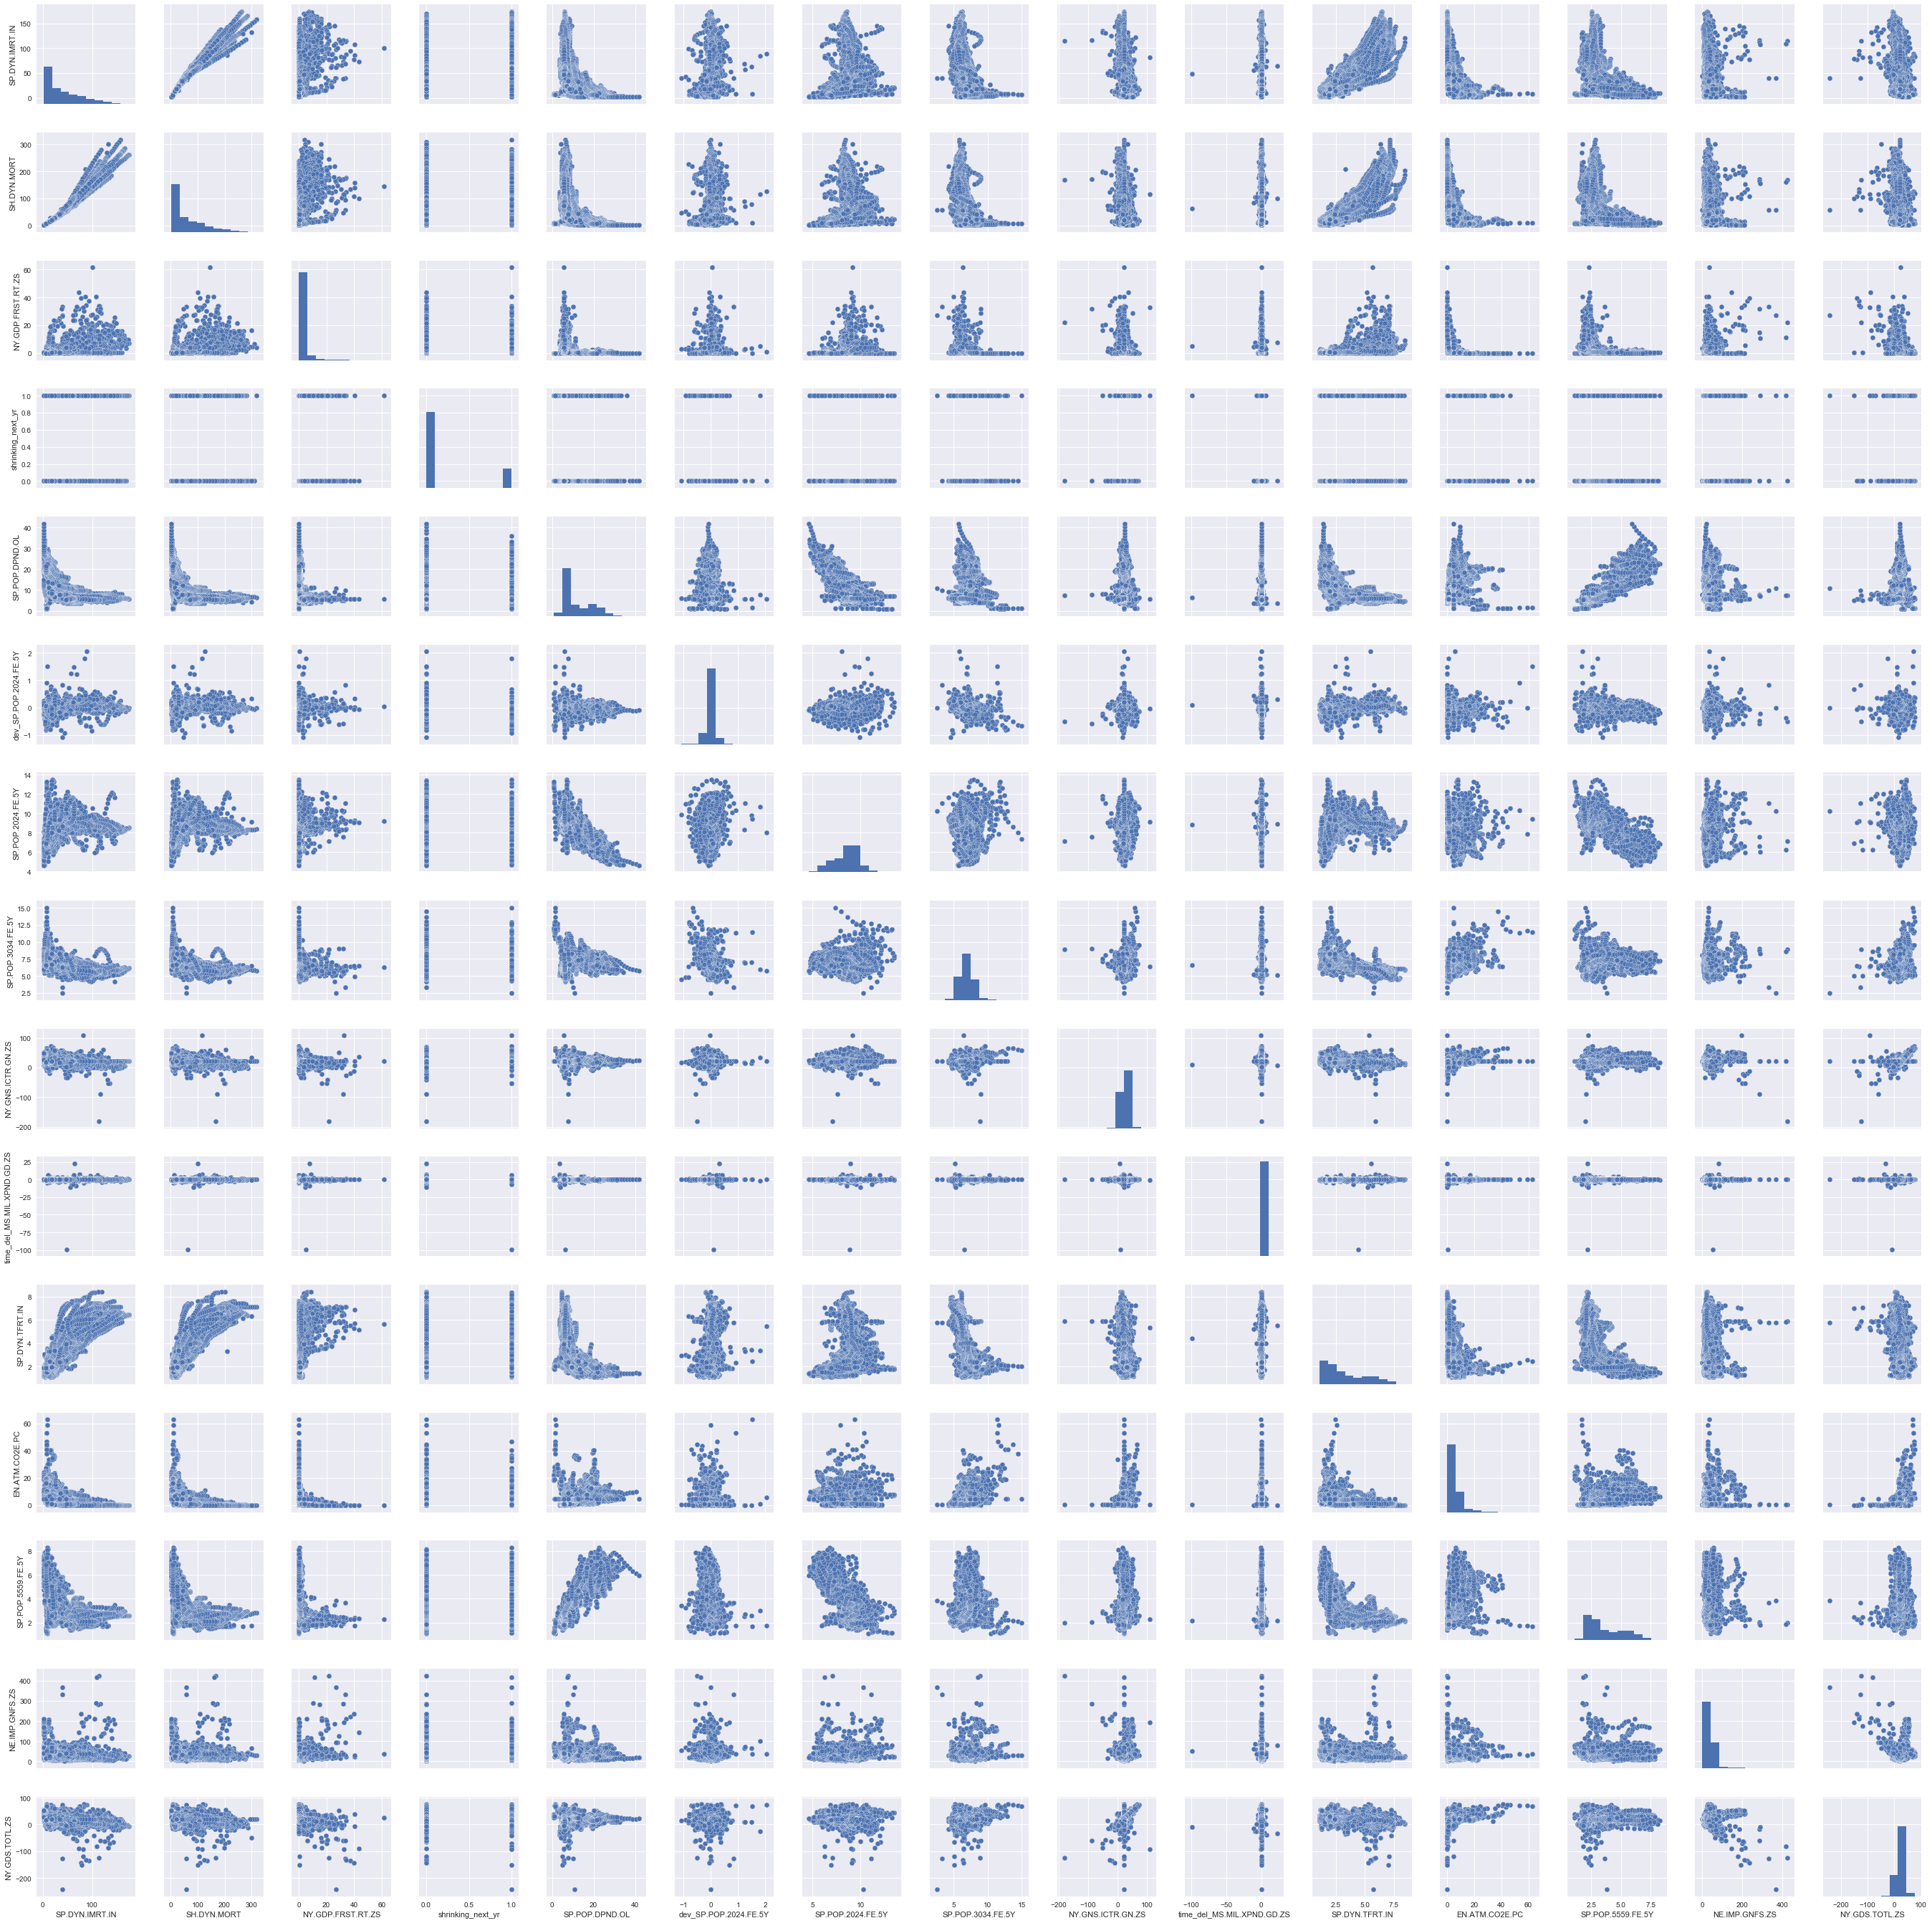

In [24]:
#Change this once have final useful features - break into two sets to plot
sns.pairplot(mean_best_test_df[final_useful_features[0:15]])

In [30]:
sns.pairplot(mean_best_test_df[final_useful_features[15:-1]])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [70]:
mean_best_test_df[final_useful_features].groupby('shrinking_next_yr').mean()

indicator_code     SP.DYN.IMRT.IN  SH.DYN.MORT  NY.GDP.FRST.RT.ZS  \
shrinking_next_yr                                                   
0.0                        39.322       56.356              1.600   
1.0                        46.281       68.856              2.263   

indicator_code     SP.POP.DPND.OL  dev_SP.POP.2024.FE.5Y  SP.POP.2024.FE.5Y  \
shrinking_next_yr                                                             
0.0                        11.781                 -0.004              8.515   
1.0                        11.580                 -0.007              8.437   

indicator_code     SP.POP.3034.FE.5Y  NY.GNS.ICTR.GN.ZS  \
shrinking_next_yr                                         
0.0                            6.956             21.974   
1.0                            6.782             21.249   

indicator_code     time_del_MS.MIL.XPND.GD.ZS  SP.DYN.TFRT.IN  EN.ATM.CO2E.PC  \
shrinking_next_yr                                                               
0.0                                    -0.033           3.251           4.696   
1.0                                    -0.139           3.673           4.731   

indicator_code     SP.POP.5559.FE.5Y  NE.IMP.GNFS.ZS  NY.GDS.TOTL.ZS  \
shrinking_next_yr                                                      
0.0                            3.776          36.980          20.450   
1.0                            3.728          40.674          18.829   

indicator_code     TM.VAL.FUEL.ZS.UN  FS.AST.PRVT.GD.ZS  SE.PRM.ENRR  \
shrinking_next_yr                                                      
0.0                           14.117             47.456       99.976   
1.0                           14.403             45.600       98.292   

indicator_code     NV.SRV.TETC.ZS  dev_AG.PRD.FOOD.XD  IT.CEL.SETS.P2  \
shrinking_next_yr                                                       
0.0                        54.808               0.663          32.462   
1.0                        54.452              -2.442          35.997   

indicator_code     SP.DYN.CDRT.IN  time_diff_SP.POP.DPND  NY.ADJ.DCO2.GN.ZS  \
shrinking_next_yr                                                             
0.0                         9.259                 -0.580              1.221   
1.0                        10.460                 -0.448              1.164   

indicator_code     NV.IND.TOTL.ZS  SP.DYN.LE00.MA.IN  SP.DYN.TO65.MA.ZS  \
shrinking_next_yr                                                         
0.0                        31.108             65.161             64.431   
1.0                        30.898             62.905             61.062   

indicator_code     FI.RES.TOTL.MO  time_del_AG.PRD.CROP.XD  NY.GDP.DEFL.KD.ZG  \
shrinking_next_yr                                                               
0.0                         4.763                    1.621             15.888   
1.0                         4.295                    1.892             96.767   

indicator_code     SP.DYN.LE00.FE.IN  SP.RUR.TOTL.ZS  NE.TRD.GNFS.ZS  
shrinking_next_yr                                                     
0.0                           70.117          44.997          70.539  
1.0                           67.705          45.619          76.150

In [71]:
def draw_feature_hists(featurex):
    fig, ax = plt.subplots(3, 1, figsize=(10, 12),sharex=True)
    indicator_x = df_indicator_large[df_indicator_large['indicator_code'] == featurex]['indicator_name']
    plt.suptitle(indicator_x)
    count0, bins_0, _ = ax[0].hist(mean_best_test_df[mean_best_test_df['shrinking_next_yr'] == 0][featurex], bins=25)
    label_0 = str(featurex) + ' economy will be growing'
    ax[0].set_title(label_0)
    count1, bins_1, _ = ax[1].hist(mean_best_test_df[mean_best_test_df['shrinking_next_yr'] == 1][featurex], bins=25)
    label_1 = str(featurex) + ' economy will be shrinking'
    bins_to_not_plot = (count0<9)&(count1<5)
    count1[bins_to_not_plot] = np.nan
    count0[bins_to_not_plot] = np.nan
    ax[1].set_title(label_1)
    ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))
    return featurex
        
        

showing histograms for 33 features currently in feature_list_to_hist


/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


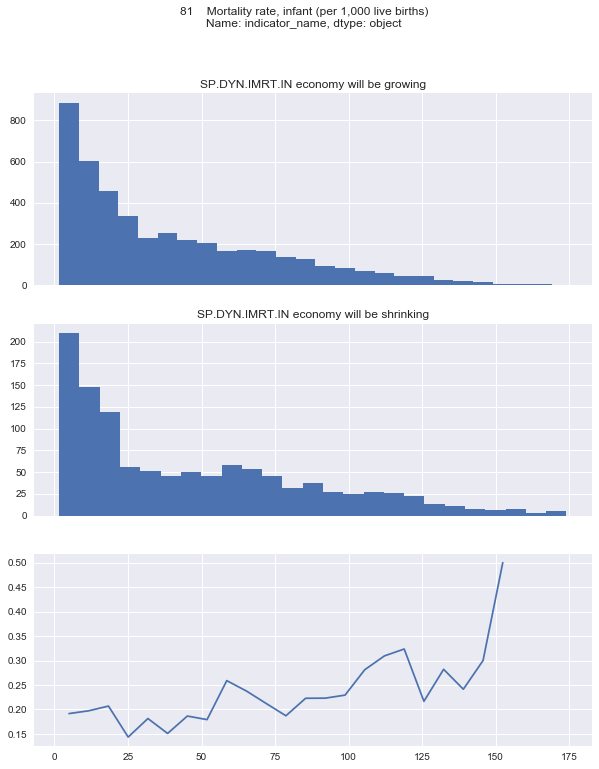

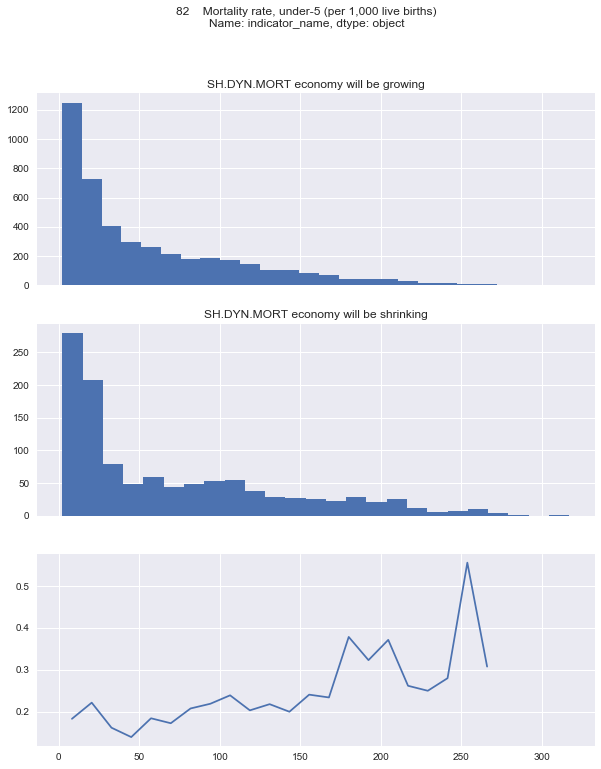

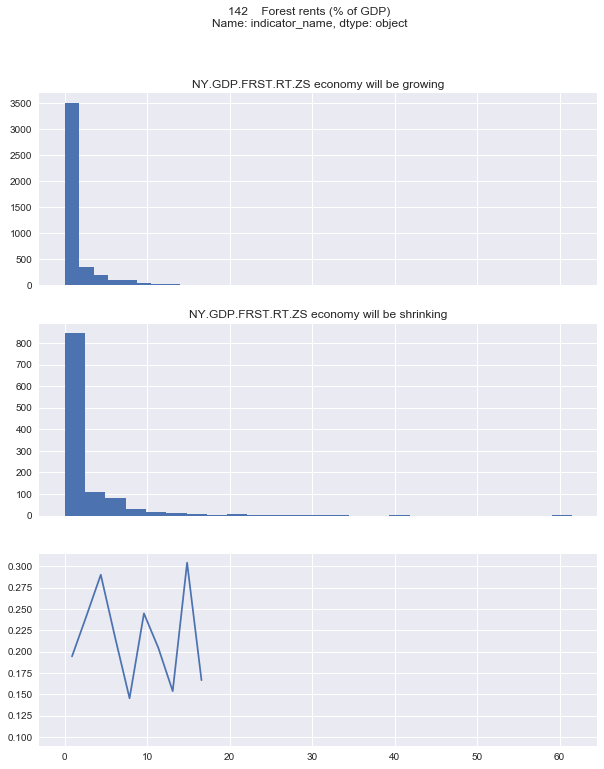

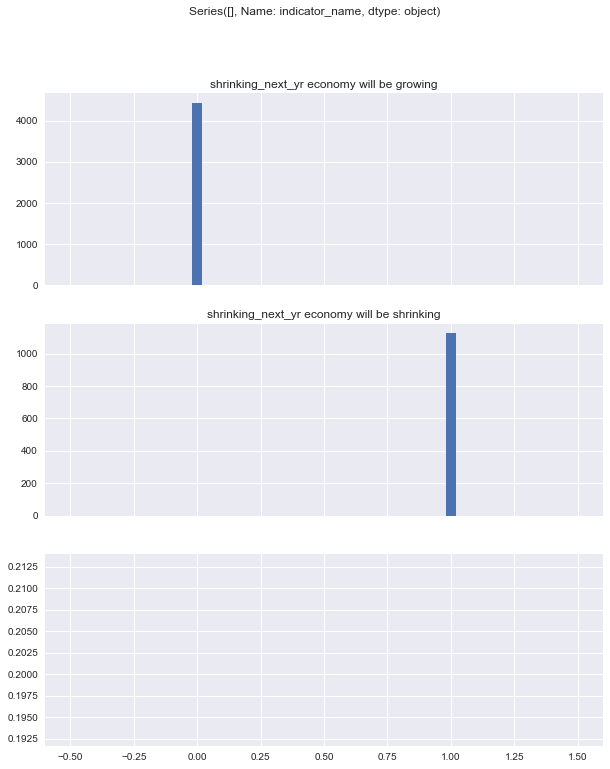

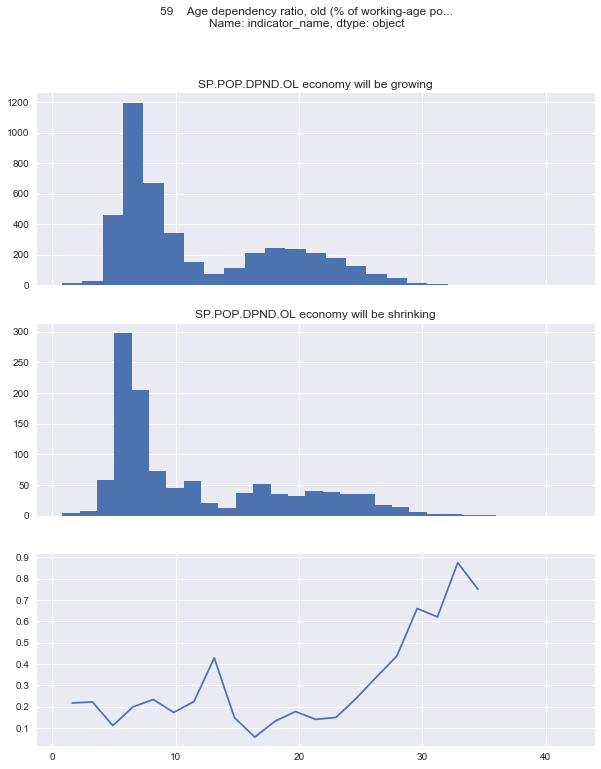

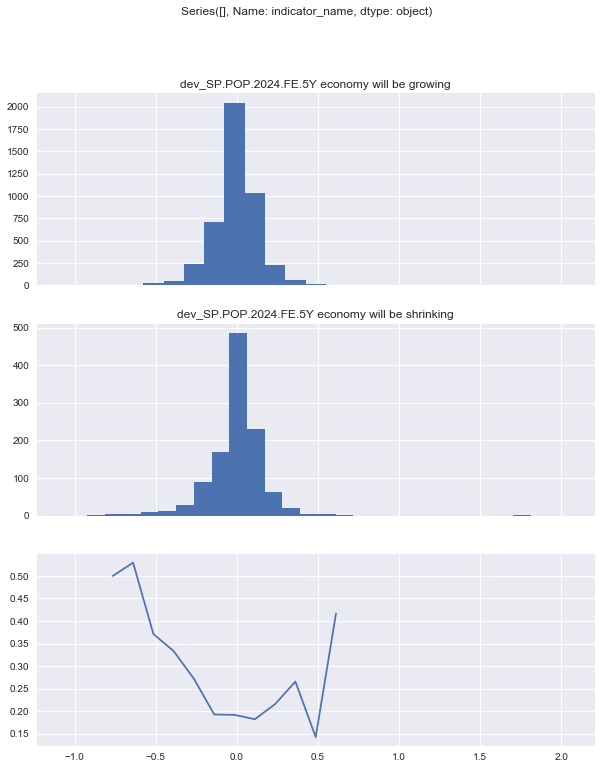

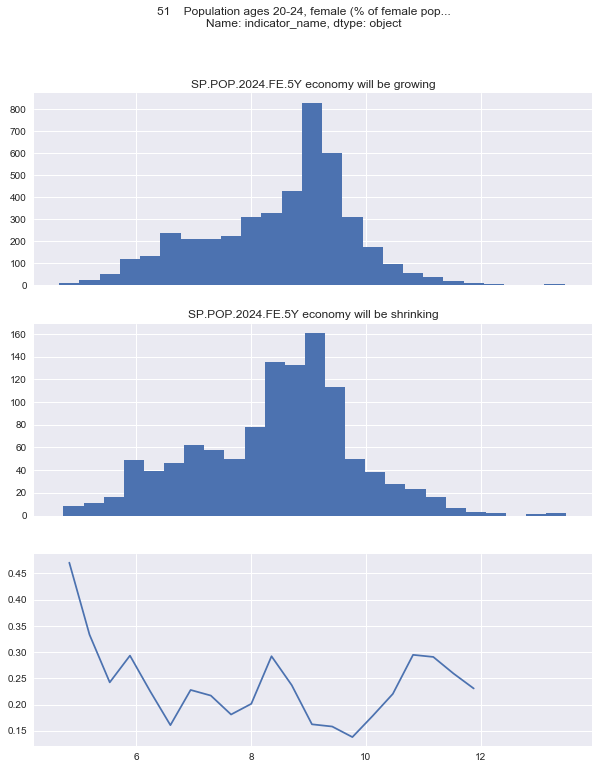

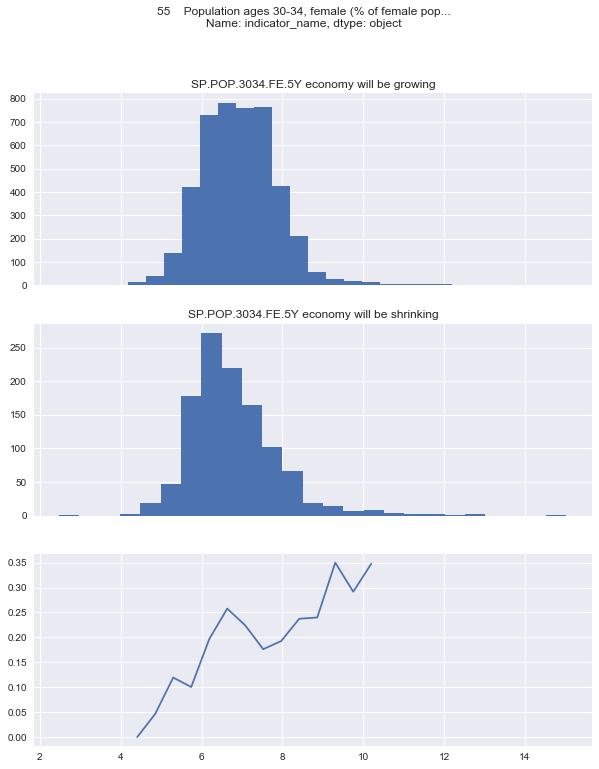

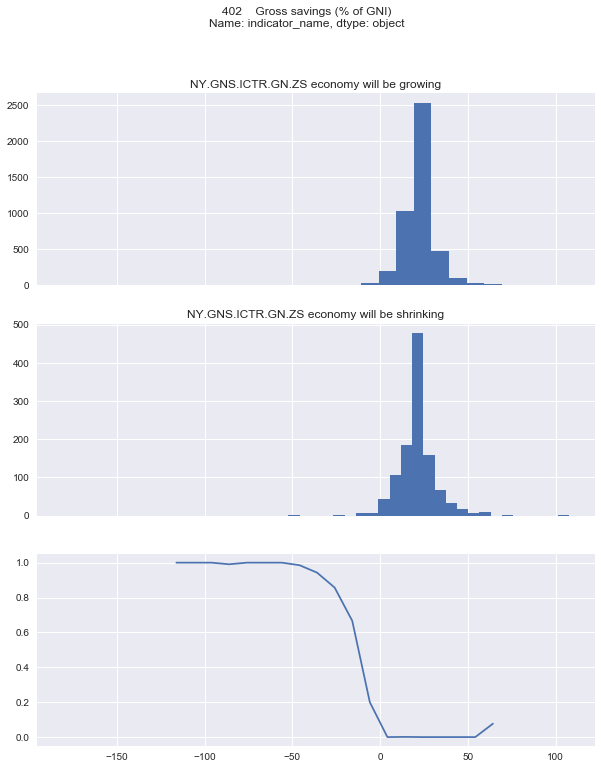

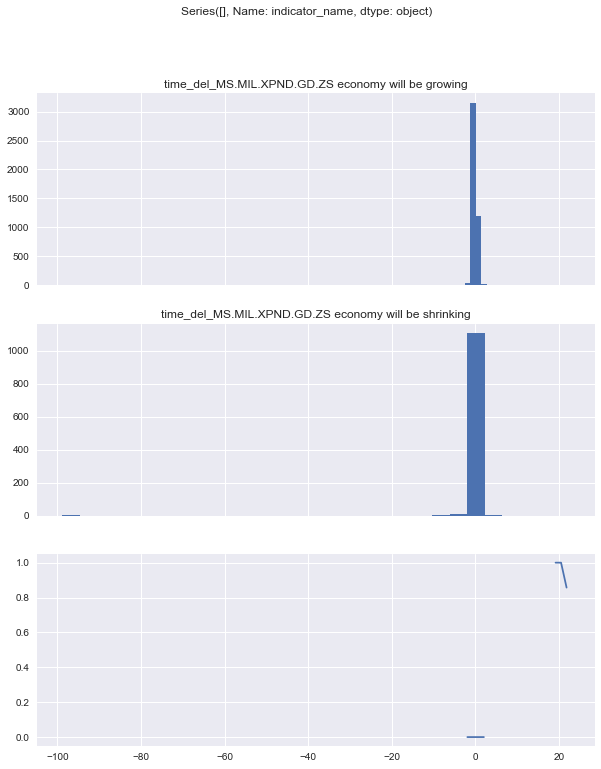

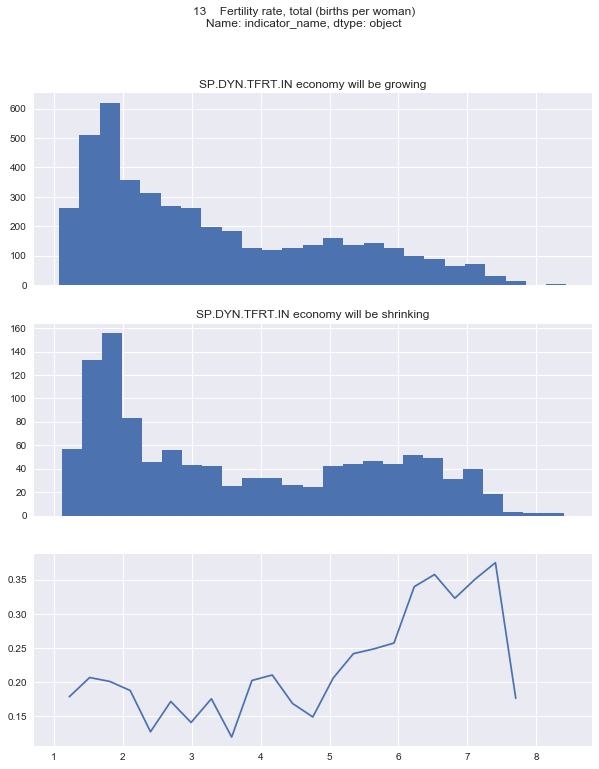

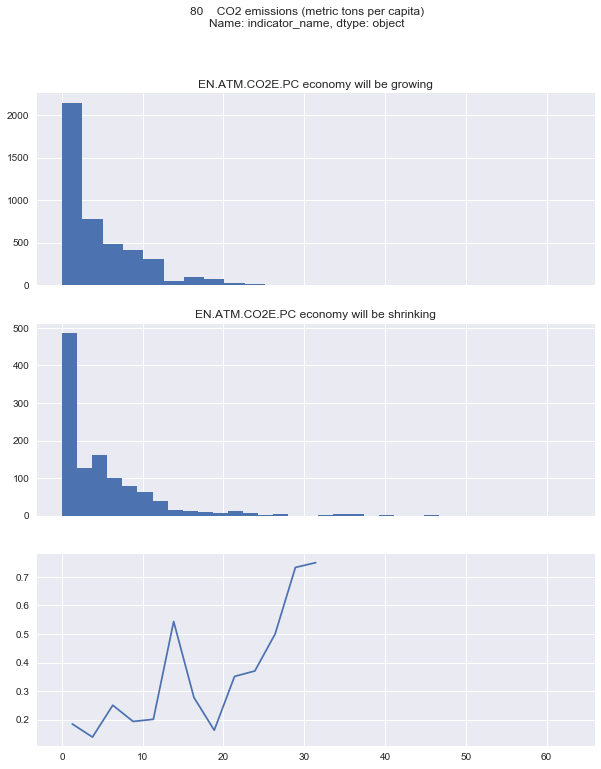

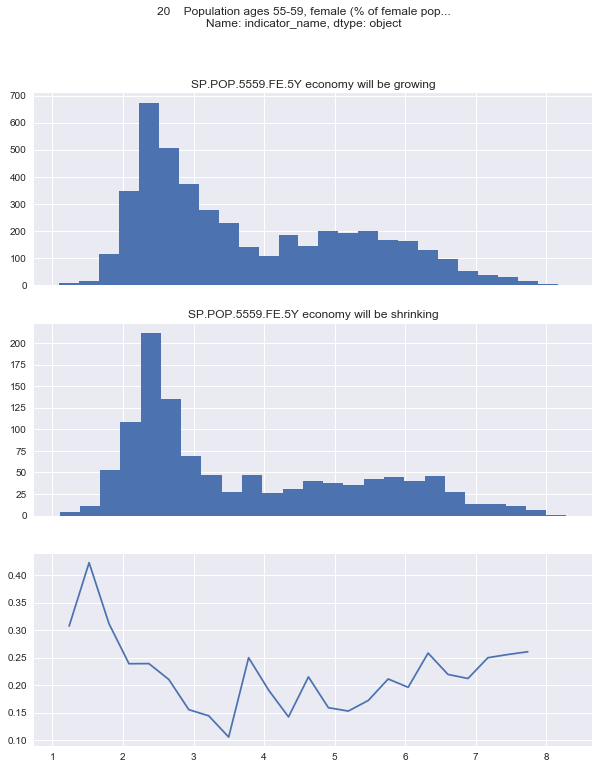

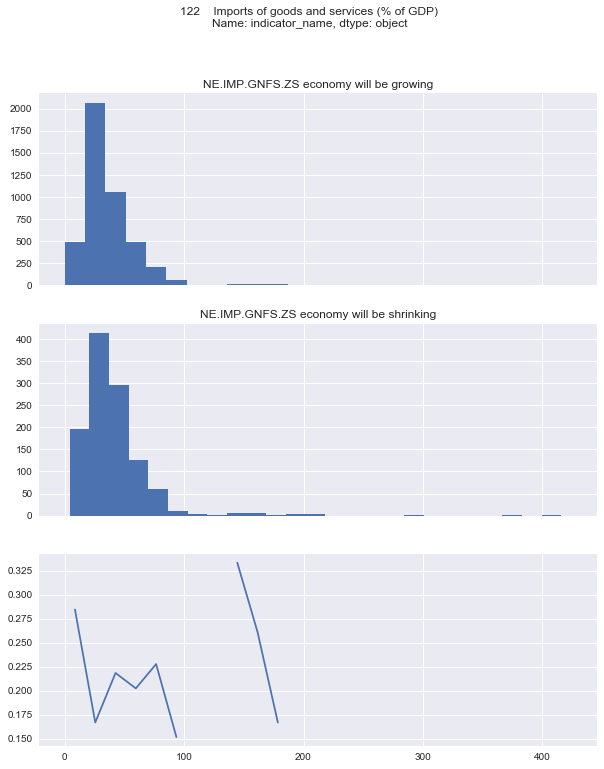

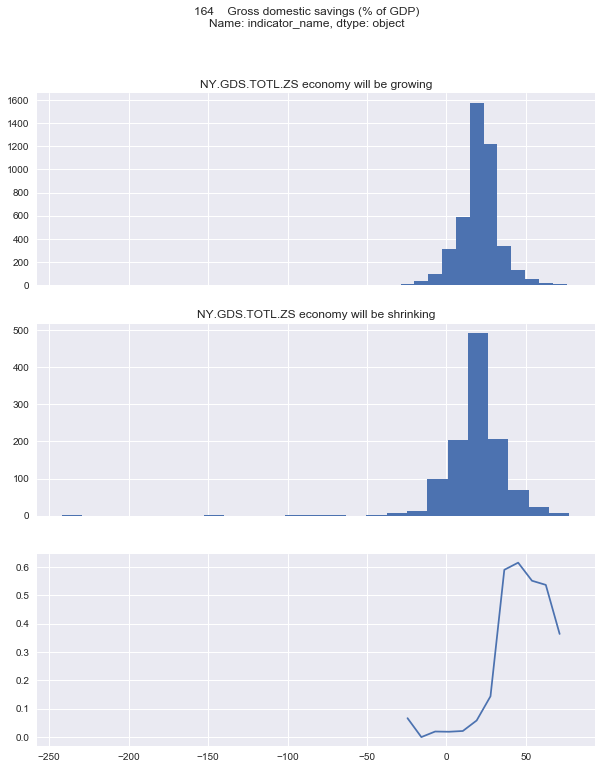

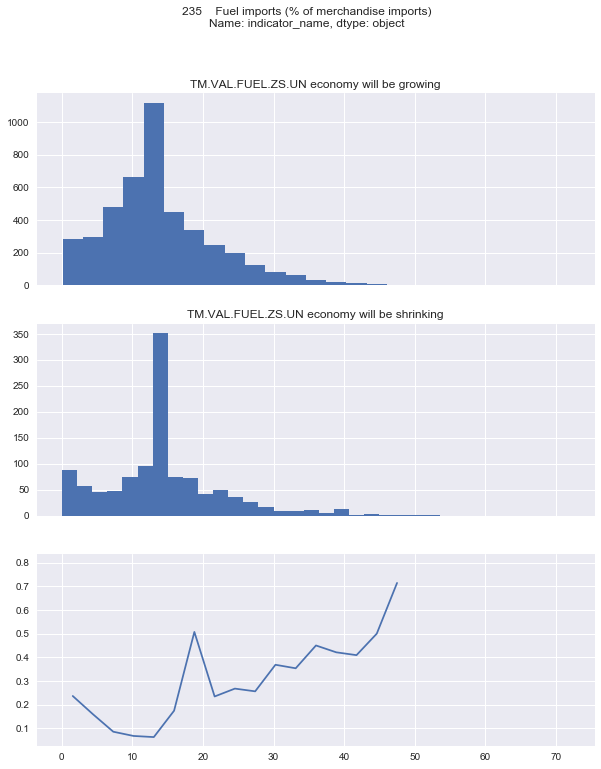

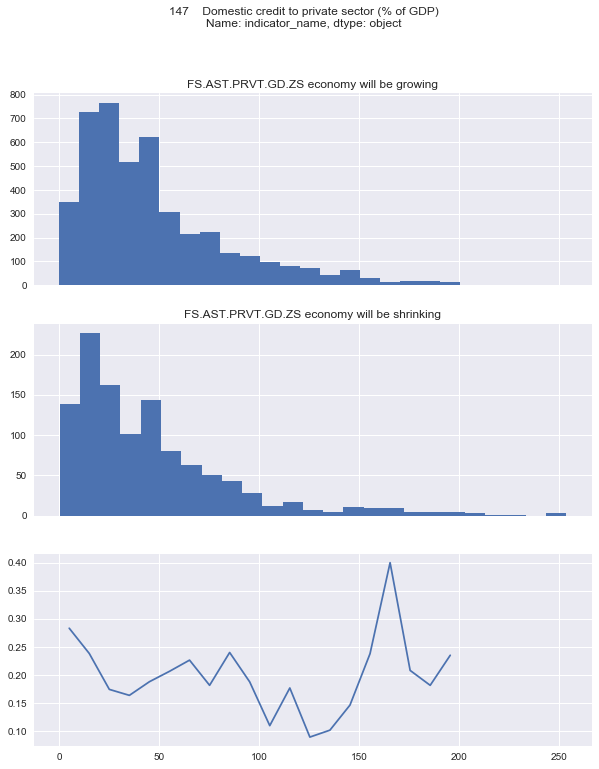

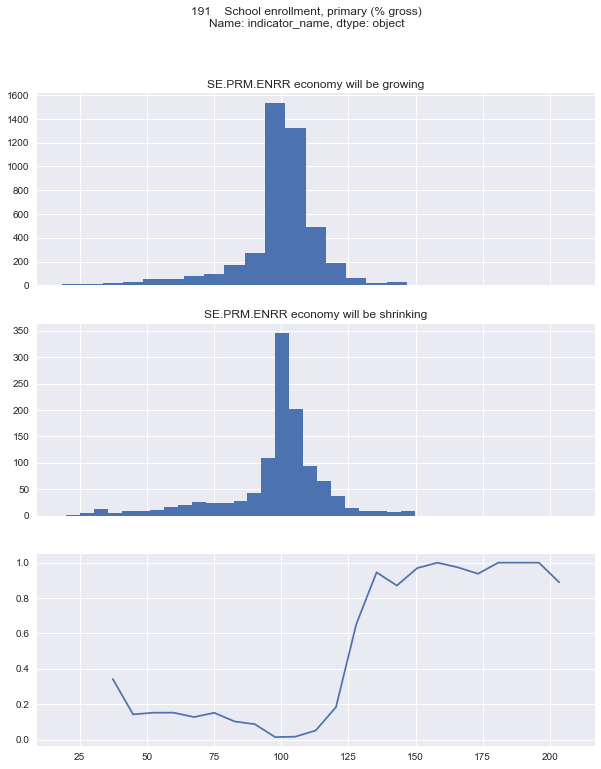

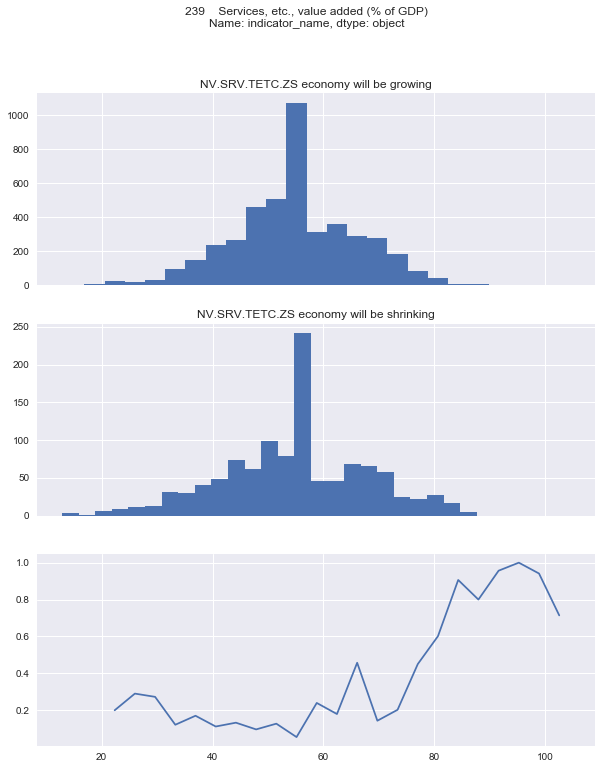

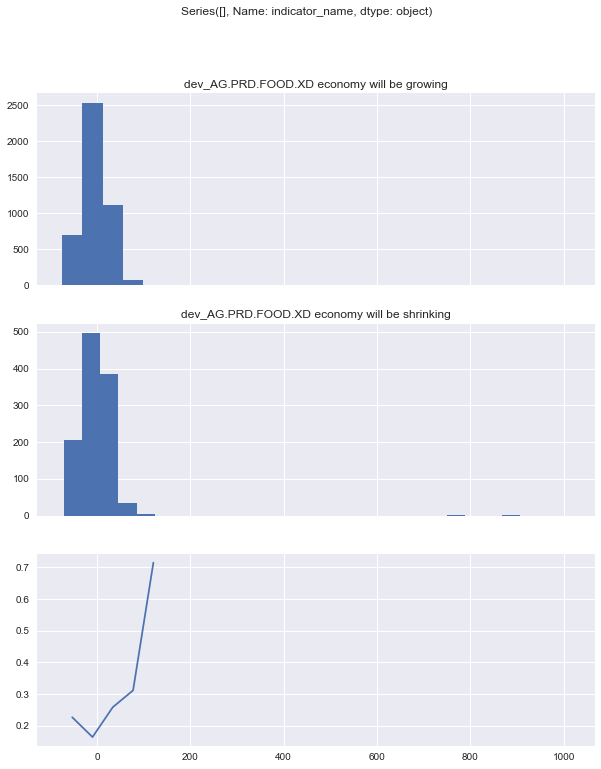

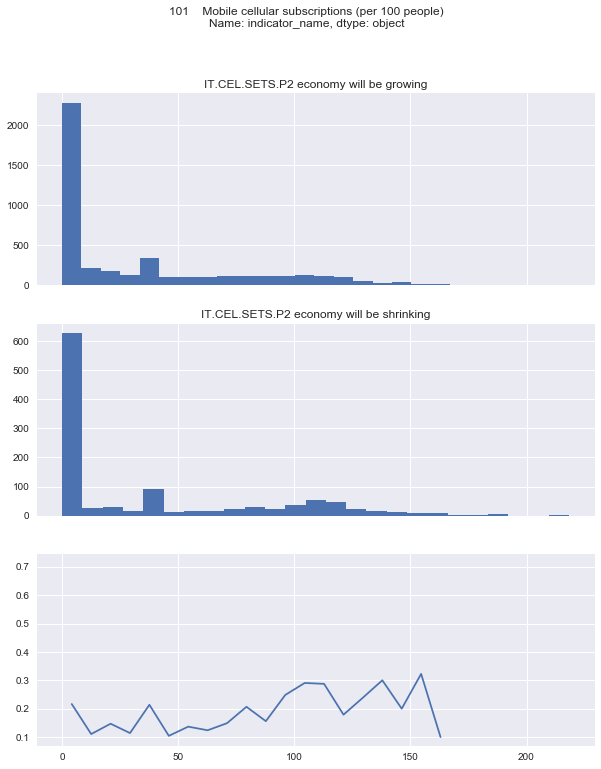

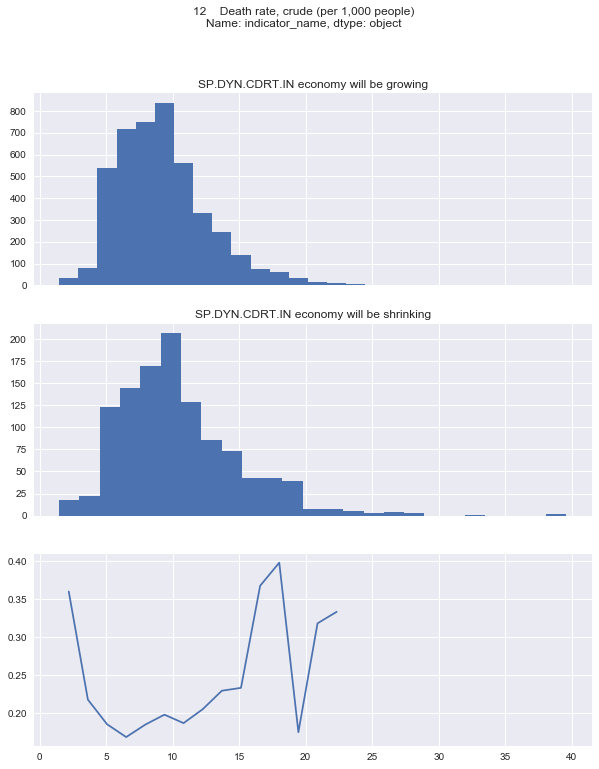

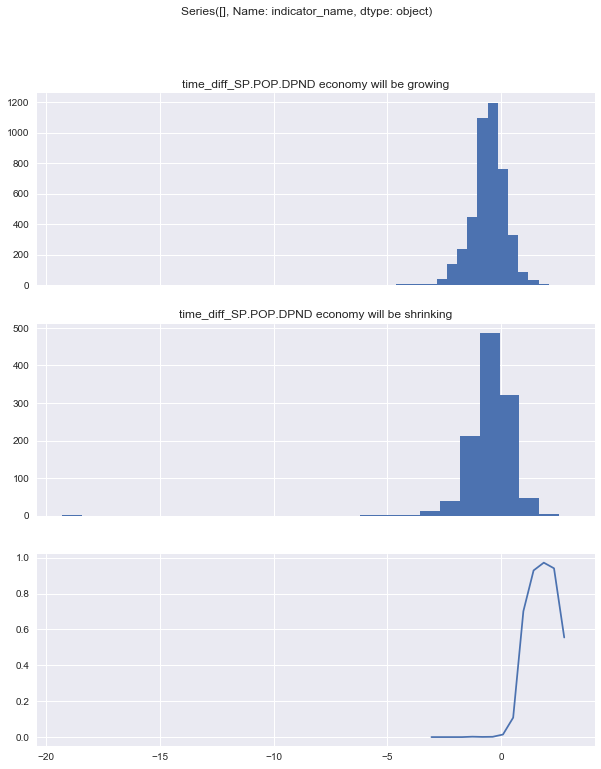

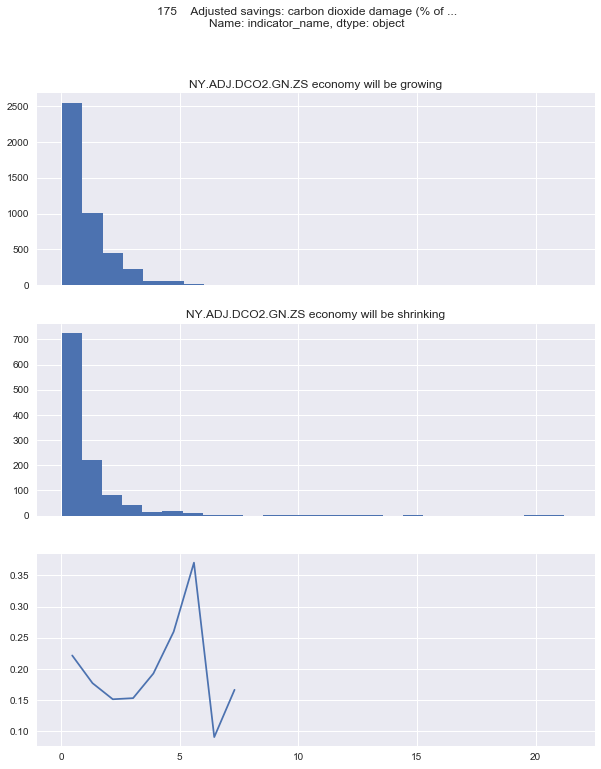

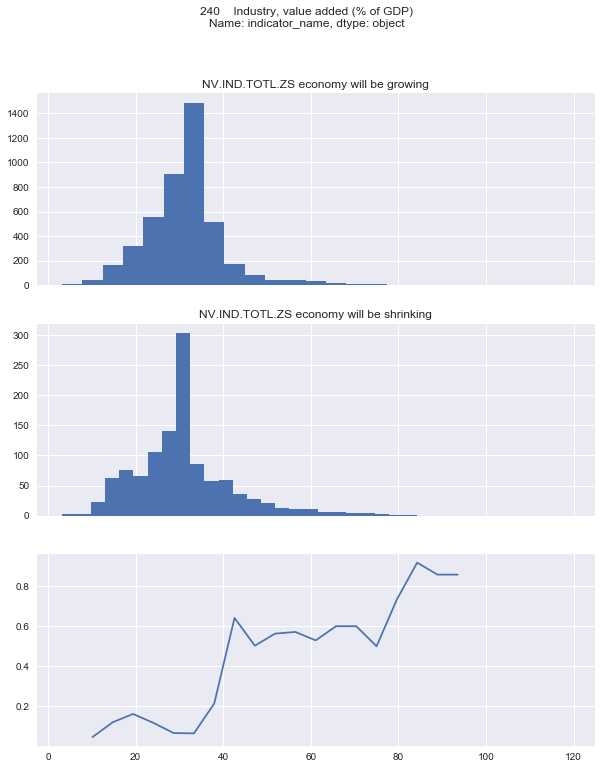

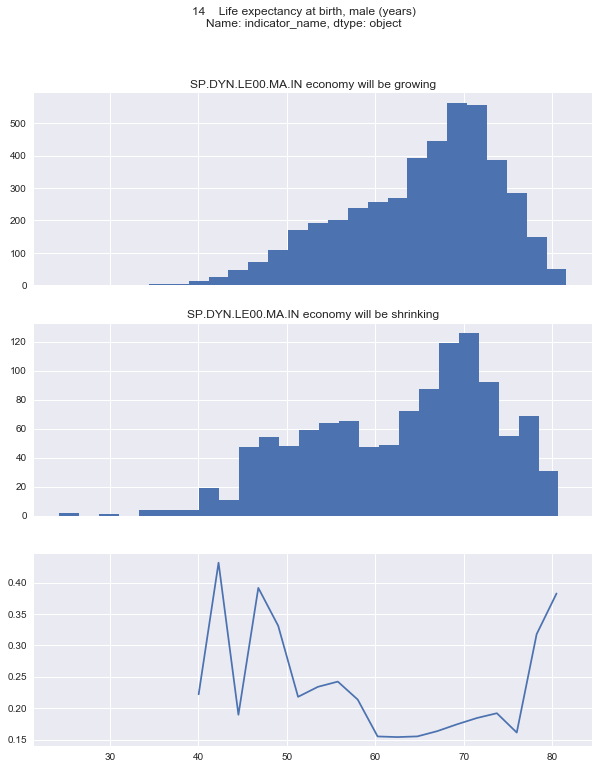

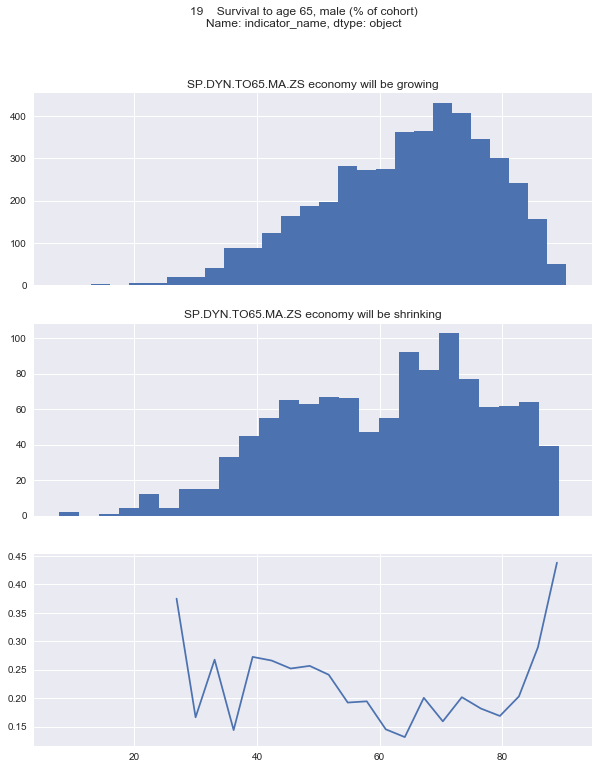

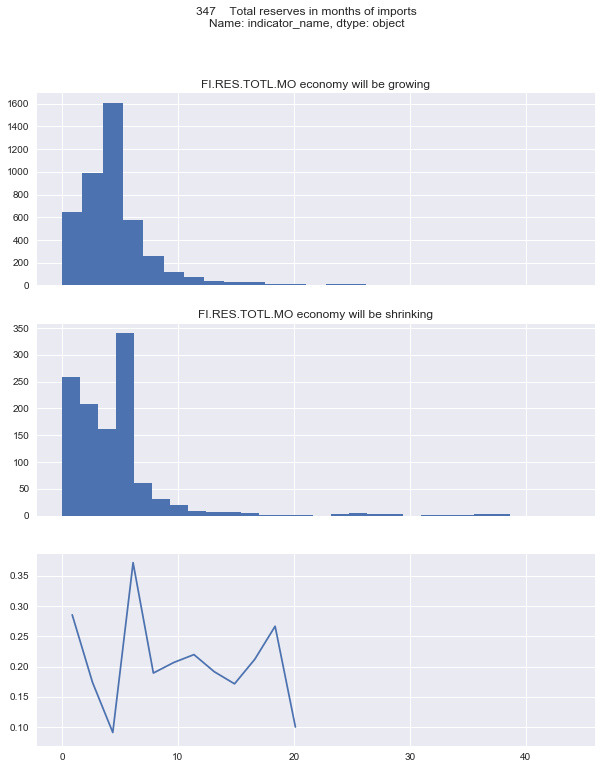

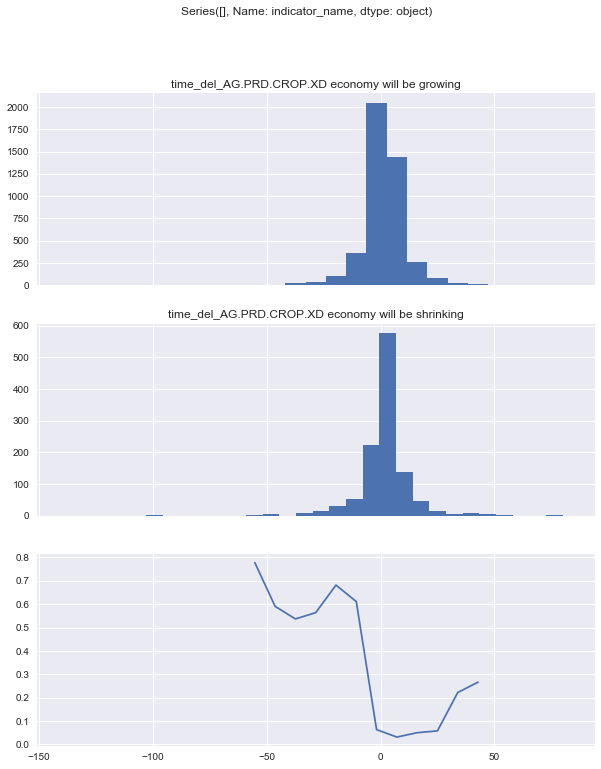

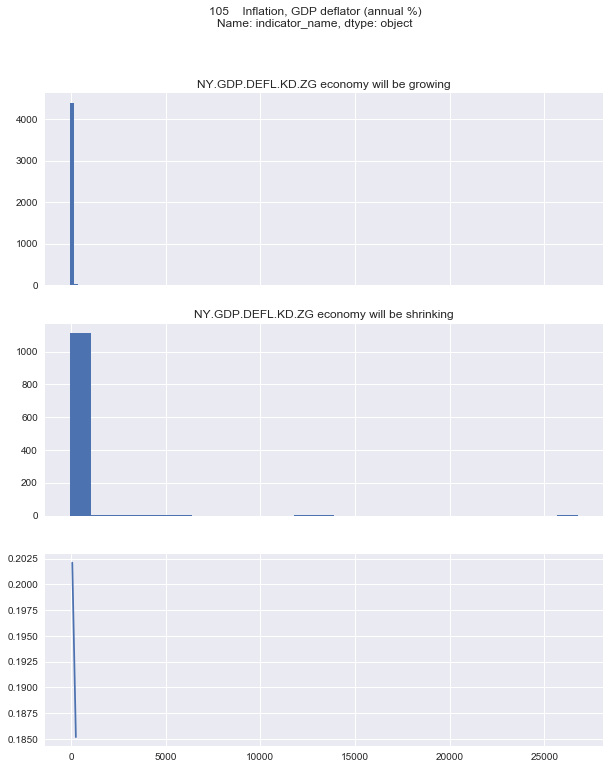

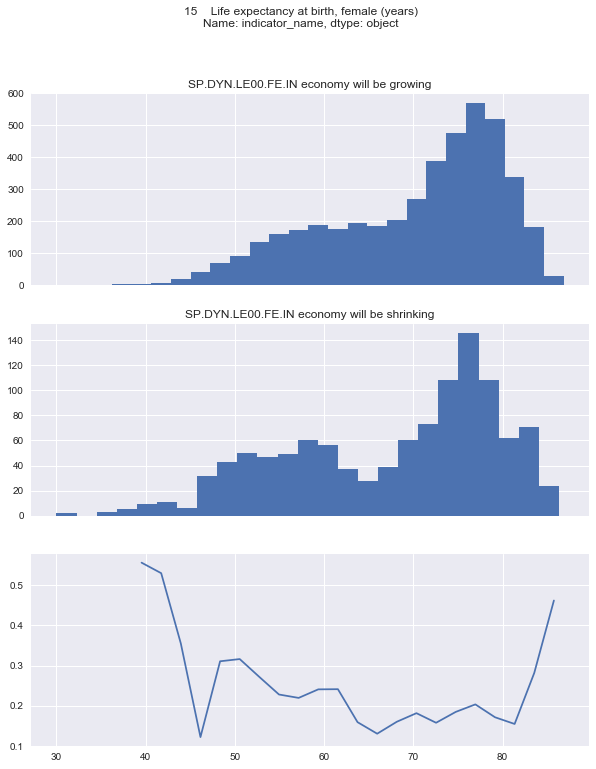

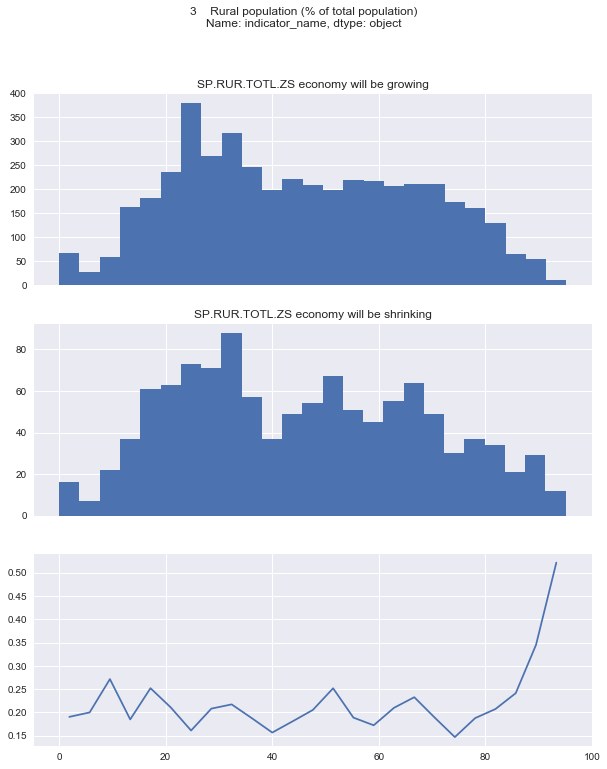

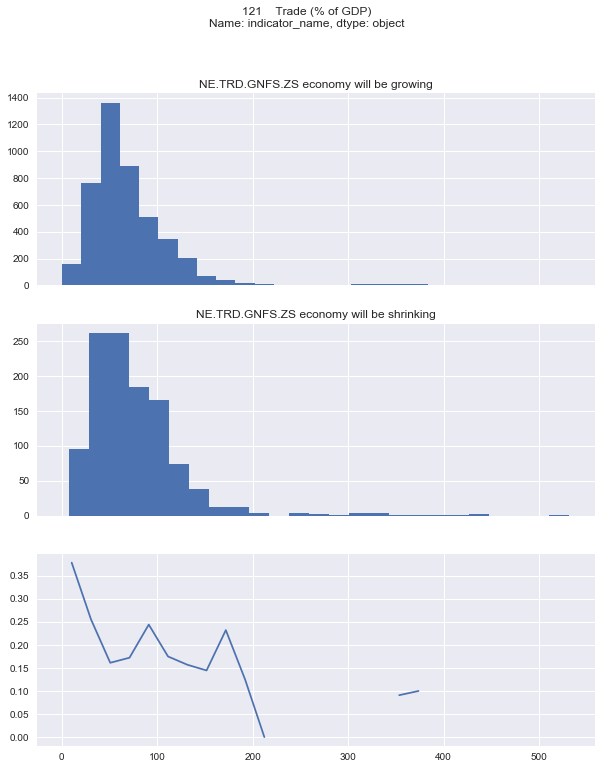

In [72]:
feature_list_to_hist = final_useful_features
print("showing histograms for", len(final_useful_features), "features currently in feature_list_to_hist")
for featurex in feature_list_to_hist:
    draw_feature_hists(featurex)

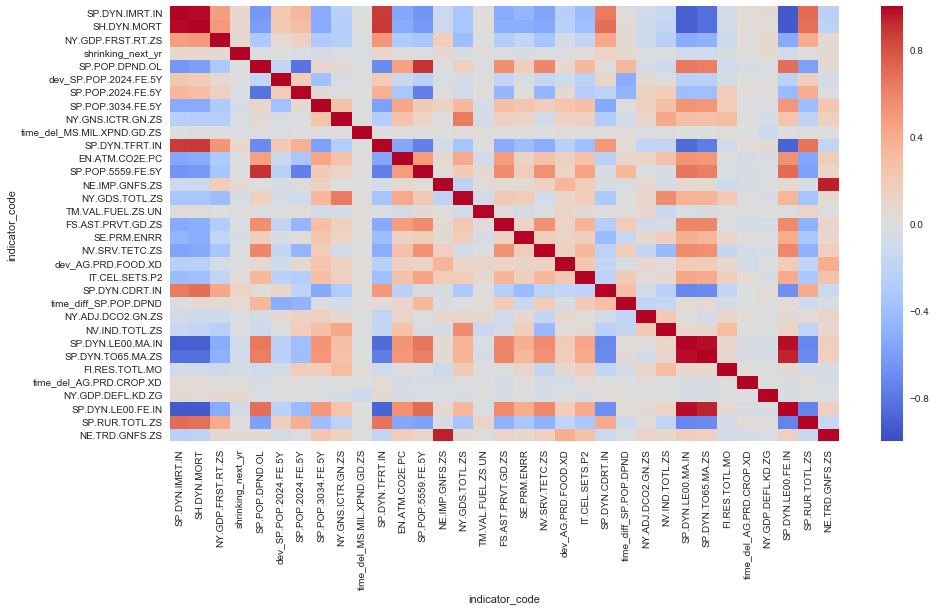

In [74]:
fig, ax = plt.subplots(figsize = (15,8))

sns.heatmap(mean_best_test_df.corr(), cmap = 'coolwarm', center = 0)

In [75]:
print("baseline probability of a shrinking economy in the data is:",100*y.mean(), "%")

baseline probability of a shrinking economy in the data is: indicator_code
shrinking_next_yr    20.284
dtype: float64 %


In [36]:
#create a stupid predictor so as to baseline our scores against 
mean_best_test_df['stupid_hard_predictor'] = mean_best_test_df['shrinking_next_yr'].mode()[0]
mean_best_test_df['stupid_proba_predictor'] = mean_best_test_df['shrinking_next_yr'].mean()
stupid_pred_vec = mean_best_test_df['stupid_hard_predictor']
stupid_pred_proba_vec = mean_best_test_df['stupid_proba_predictor']


In [77]:
X.shape, y.shape

((5566, 32), (5566, 1))

In [28]:
y_series = pd.Series(y['shrinking_next_yr'])


In [80]:
len(y)

5566

/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

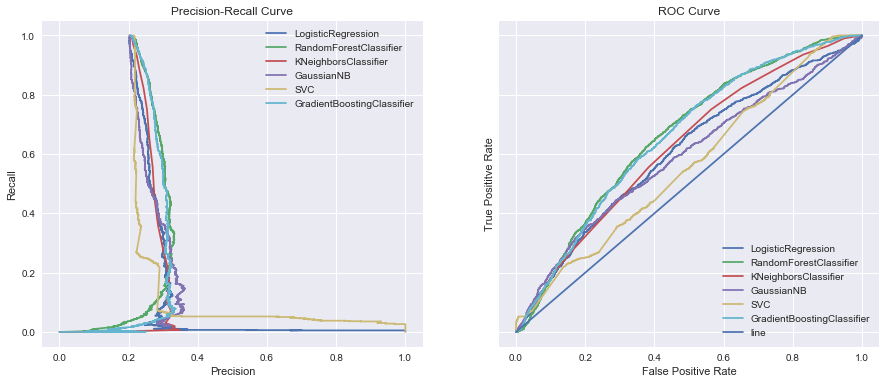

In [81]:
#create plot of LogisticRegression, RandomForestClassifier, KNeighborsClassifier, and GaussianNB 
#ontop of eachother before choosing single model thresholds

logr_model = LogisticRegression(penalty = 'l1')
rf_model = RandomForestClassifier(n_estimators = 50, min_samples_leaf = 5)
KNN_model = KNeighborsClassifier(n_neighbors = 40)
NB_model = GaussianNB()
SVM_model = SVC(probability = True)
grad_boost_model = GradientBoostingClassifier(loss = 'exponential', learning_rate = 0.065, n_estimators = 75, min_samples_split = 3 )

std = StandardScaler()
cv = StratifiedKFold(n_splits = 5, shuffle = False)

models_to_plot = [logr_model, rf_model, KNN_model, NB_model, SVM_model, grad_boost_model]
d = collections.defaultdict(list)

for mod in models_to_plot:
    for train_index, test_index in cv.split(X, y_series):    #loop over the folds
        X_train, X_test = X.iloc[train_index], X.iloc[test_index] #create training and test independent variable data without scaling
        std.fit(X_train) #apply fit only only training ddata
        X_tr, X_te = std.transform(X_train), std.transform(X_test)    #apply standard scaler and use to find best alpha
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
    mod.fit(X_tr, y_train)
    y_train_predict_vec = mod.predict(X_train)
    
    y_prob_pred_mat = cross_val_predict(mod, X, y_series, cv=cv, method = 'predict_proba')
    y_prob_pred_mat    
    y_prob_pred_vec = y_prob_pred_mat[:,1]

    prec, recall, thresholds_pr = precision_recall_curve(y,y_prob_pred_vec)
    d['prec'].append(prec[0:-1])
    d['recall'].append(recall[0:-1])
    
    fpr, tpr, thresholds_roc = roc_curve(y,y_prob_pred_vec)
    d['fpr'].append(fpr)
    d['tpr'].append(tpr)
    

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize = (15,6))

#plt.subplot(1,2,1)
for n in range(0, len(models_to_plot)):
    ax1.plot(d['prec'][n], d['recall'][n])
    
legend_text = []
for mod in models_to_plot:
    leg = str(mod).split('(')[0]
    legend_text.append(leg)

l1 = ax1.legend(legend_text, loc ='upper right')   
l1.draw_frame(False)
    
ax1.set_xlabel('Precision')
ax1.set_ylabel('Recall')
ax1.set_title('Precision-Recall Curve')


for n in range(0, len(models_to_plot)):
    ax2.plot(d['fpr'][n], d['tpr'][n])
ax2.plot(np.linspace(0,1,100), np.linspace(0,1,100))

legend2_text = []
for mod in models_to_plot:
    leg2 = str(mod).split('(')[0]
    legend2_text.append(leg2)
legend2_text.append('line')
    
l2 = ax2.legend(legend2_text, loc ='lower right')    
l2.draw_frame(False)
    
ax2.set_ylabel('True Posititve Rate')
ax2.set_xlabel('False Positive Rate')
ax2.set_title('ROC Curve')

/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


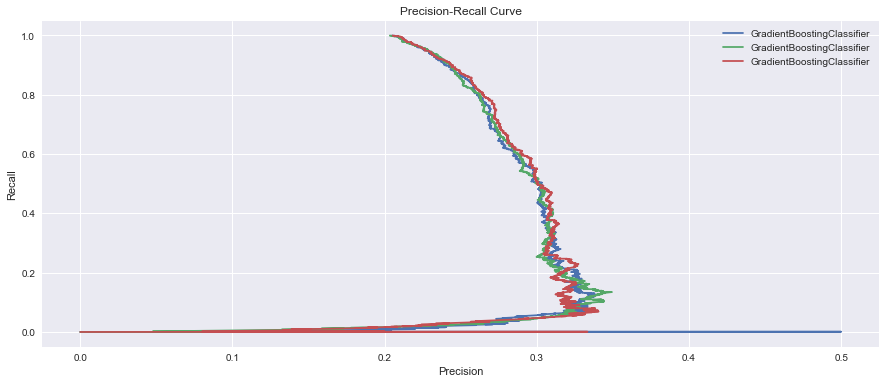

In [82]:
#create plots of Various GradientBoostedTrees With Different Parameters
#ontop of eachother before choosing single model thresholds

grad_boost_model_1 = GradientBoostingClassifier(loss = 'exponential', learning_rate = 0.05, n_estimators = 75, min_samples_split = 3)
grad_boost_model_2 = GradientBoostingClassifier(loss = 'exponential', learning_rate = 0.06, n_estimators = 75, min_samples_split = 3)
grad_boost_model_3 = GradientBoostingClassifier(loss = 'exponential', learning_rate = 0.065, n_estimators = 75, min_samples_split = 3)

std = StandardScaler()
cv = StratifiedKFold(n_splits = 5, shuffle = False)

models_to_plot = [grad_boost_model_1, grad_boost_model_2, grad_boost_model_3]
d = collections.defaultdict(list)

for mod in models_to_plot:
    for train_index, test_index in cv.split(X, y_series):    #loop over the folds
        X_train, X_test = X.iloc[train_index], X.iloc[test_index] #create training and test independent variable data without scaling
        std.fit(X_train) #apply fit only only training ddata
        X_tr, X_te = std.transform(X_train), std.transform(X_test)    #apply standard scaler and use to find best alpha
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
    mod.fit(X_tr, y_train)
    y_train_predict_vec = mod.predict(X_train)
    
    y_prob_pred_mat = cross_val_predict(mod, X, y_series, cv=cv, method = 'predict_proba')
    y_prob_pred_mat    
    y_prob_pred_vec = y_prob_pred_mat[:,1]

    prec, recall, thresholds_pr = precision_recall_curve(y,y_prob_pred_vec)
    d['prec'].append(prec[0:-1])
    d['recall'].append(recall[0:-1])
    
    fpr, tpr, thresholds_roc = roc_curve(y,y_prob_pred_vec)
    d['fpr'].append(fpr)
    d['tpr'].append(tpr)
    

fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=True, figsize = (15,6))

#plt.subplot(1,2,1)
for n in range(0, len(models_to_plot)):
    ax1.plot(d['prec'][n], d['recall'][n])
    
legend_text = []
for mod in models_to_plot:
    leg = str(mod).split('(')[0]
    legend_text.append(leg)

l1 = ax1.legend(legend_text, loc ='upper right')   
l1.draw_frame(False)
    
ax1.set_xlabel('Precision')
ax1.set_ylabel('Recall')
ax1.set_title('Precision-Recall Curve')


# for n in range(0, len(models_to_plot)):
#     ax2.plot(d['fpr'][n], d['tpr'][n])
# ax2.plot(np.linspace(0,1,100), np.linspace(0,1,100))

# legend2_text = []
# for mod in models_to_plot:
#     leg2 = str(mod).split('(')[0]
#     legend2_text.append(leg2)
# legend2_text.append('line')
    
# l2 = ax2.legend(legend2_text, loc ='lower right')    
# l2.draw_frame(False)
    
# ax2.set_ylabel('True Posititve Rate')
# ax2.set_xlabel('False Positive Rate')
# ax2.set_title('ROC Curve')

/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


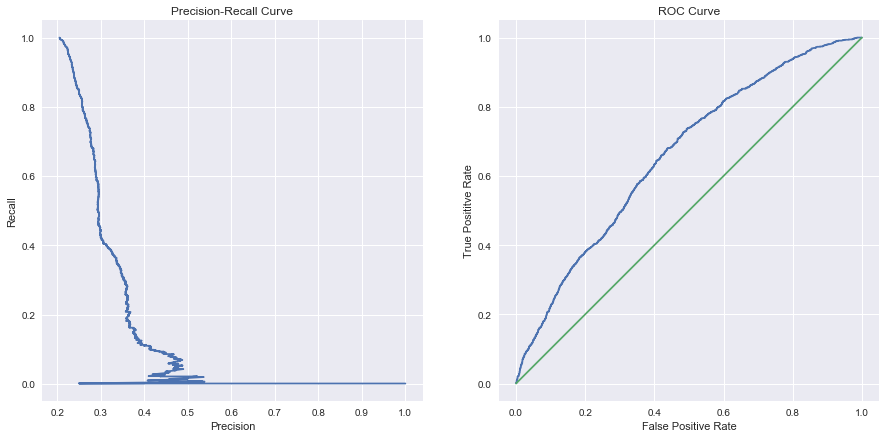

In [40]:
grad_boost_model = GradientBoostingClassifier(loss = 'exponential', learning_rate = 0.065, n_estimators = 75, min_samples_split = 2)
std = StandardScaler()
#cv = KFold(n_splits = 4, shuffle = False)
cv = StratifiedKFold(n_splits = 4, shuffle = False)

for train_index, test_index in cv.split(X, y_series):    #loop over the folds
    X_train_lr, X_test_lr = X.iloc[train_index], X.iloc[test_index] #create training and test independent variable data without scaling
    std.fit(X_train) #apply fit only only training ddata
    X_tr_lr, X_te_lr = std.transform(X_train_lr), std.transform(X_test_lr)    #apply standard scaler and use to find best alpha
    y_train_lr, y_test_lr = y.iloc[train_index], y.iloc[test_index]

grad_boost_model.fit(X_tr_lr, y_train_lr)
y_train_predict_vec = logr_model.predict(X_train)
    
y_prob_pred_mat = cross_val_predict(grad_boost_model, X, y_series, cv=cv, method = 'predict_proba')
y_prob_pred_mat    
y_prob_pred_vec = y_prob_pred_mat[:,1]

fig, ax = plt.subplots(figsize = (15,7))

plt.subplot(1,2,1)
prec, recall, thresholds_pr = precision_recall_curve(y,y_prob_pred_vec)
plt.plot(prec[0:-1], recall[0:-1])

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')

plt.subplot(1,2,2)
fpr, tpr, thresholds_roc = roc_curve(y,y_prob_pred_vec)
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))
plt.ylabel('True Posititve Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')

In [41]:
#joblib.dump(grad_boost_model, 'wdi_grad_boost_model.pkl') 

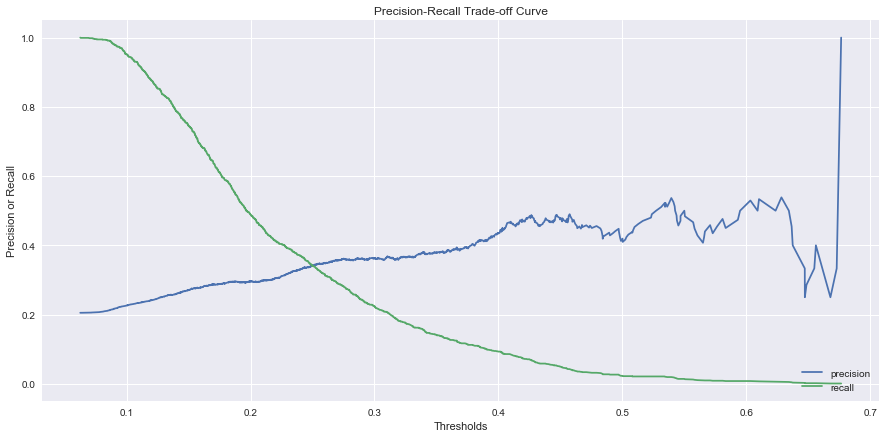

In [42]:
fig, ax = plt.subplots(figsize = (15,7))

plt.subplot(1,1,1)
prec, recall, thresholds_pr = precision_recall_curve(y,y_prob_pred_vec)
plt.plot(thresholds_pr, prec[0:-1])
plt.plot(thresholds_pr, recall[0:-1])

plt.xlabel('Thresholds')
plt.ylabel('Precision or Recall')
plt.title('Precision-Recall Trade-off Curve')
plt.legend(['precision', 'recall'], loc = 'lower right')


In [43]:
precision_recall_combo = []
for n in range(0, len(thresholds_pr)-1):
    combo = recall[n] + prec[n]
    precision_recall_combo.append(combo)

potential_threshold_index = np.argmax(precision_recall_combo)
print("potential thresholds are at indexes:", potential_threshold_index)
print("this is where recall is:", recall[potential_threshold_index], " and where precision is:", prec[potential_threshold_index])

potential thresholds are at indexes: 0
this is where recall is: 1.0  and where precision is: 0.20516082137


In [44]:
#CHOOSE PREC_THRESH MANUALLY!
prec_thresh = 0.255
tuple_thresh_index_prec_value = min(enumerate(prec), key=lambda x: abs(x[1]-prec_thresh))
print("What about using a threshold of index precision pair value:", tuple_thresh_index_prec_value)


What about using a threshold of index precision pair value: (1400, 0.25499316005471956)


In [45]:
#WORK THROUGH POSSIBLE INDEX ADDITION AND SUBTRACTION TO FIND WHAT TO USE
possible_index = tuple_thresh_index_prec_value[0] 
print(possible_index)

thresholds_pr[possible_index], prec[possible_index], recall[possible_index], recall[possible_index] + prec[possible_index]

1400


(0.13280175738432382,
 0.25499316005471956,
 0.82550930026572189,
 1.0805024603204414)

In [50]:
thresh = thresholds_pr[possible_index]

hard_pred_vec = (y_prob_pred_vec > thresh).astype(int)

TP_over_TP_and_FP = precision_score(y, hard_pred_vec)
TP_over_TP_and_FN = recall_score(y, hard_pred_vec)
f1_val = f1_score(y, hard_pred_vec)
acc_val = accuracy_score(y, hard_pred_vec)
logloss_val = log_loss(y, y_prob_pred_vec)
rocauc_val = roc_auc_score(y, y_prob_pred_vec)
rocauc_val_train = roc_auc_score(y_train, y_train_predict_vec)

print("For our model type of:", grad_boost_model)

print("\nPrecision Score is:", TP_over_TP_and_FP, "This is the proportion of True Positives out of (True Positives + False Positives)")
print("Recall Score is:", TP_over_TP_and_FN, "This is the proportion of True Positives out of (True Positives + False Negatives)")
print("f1 Score is:", f1_val)
print("Log Loss is:", logloss_val, "smaller is better")
print("ROC AUC Score is:", rocauc_val, "closest to 1 is best")
print("Accuracy Score is:", acc_val)
print("Training ROC AUC Score is:", rocauc_val_train)

TP_over_TP_and_FP_stupid = precision_score(y, stupid_pred_vec[0:len(y)])
TP_over_TP_and_FN_stupid = recall_score(y, stupid_pred_vec[0:len(y)])
f1_val_stupid = f1_score(y, stupid_pred_vec[0:len(y)])
acc_val_stupid = accuracy_score(y, stupid_pred_vec[0:len(y)])
logloss_val_stupid = log_loss(y, stupid_pred_proba_vec[0:len(y)])
rocauc_val_stupid = roc_auc_score(y, stupid_pred_proba_vec[0:len(y)])

print("\nStupid Precision Score is:", TP_over_TP_and_FP_stupid)
print("Stupid Recall Score is:", TP_over_TP_and_FN_stupid)
print("Stupid f1 Score is:", f1_val_stupid)
print("Stupid Log Loss is:", logloss_val_stupid)
print("Stupid ROC AUC Score is:", rocauc_val_stupid)
print("Stupid Accuracy Score is:", acc_val_stupid)

print("\nOur model has comparative scores to our stupid predictor of:")
print("Precision score is larger by:", TP_over_TP_and_FP - TP_over_TP_and_FP_stupid)
print("Recall score is larger by:", TP_over_TP_and_FN - TP_over_TP_and_FN_stupid)
print("f1 score is larger by:", f1_val - f1_val_stupid)
print("Log Loss score is smaller by :", -(logloss_val_stupid - logloss_val))
print("ROC AUC score is larger by:", rocauc_val - rocauc_val_stupid, '\n')
print("Accuracy score is larger by:", acc_val - acc_val_stupid, '\n')

coeficients_list = list(zip(X.columns,grad_boost_model.feature_importances_) )
coeficients_list.sort(key=lambda x: abs(x[1]), reverse = True)
for co in coeficients_list:
    print(co)

For our model type of: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.065, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=75, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

Precision Score is: 0.255062944718 This is the proportion of True Positives out of (True Positives + False Positives)
Recall Score is: 0.825509300266 This is the proportion of True Positives out of (True Positives + False Negatives)
f1 Score is: 0.38971356889
Log Loss is: 0.480702914119 smaller is better
ROC AUC Score is: 0.659837468681 closest to 1 is best
Accuracy Score is: 0.47556593604
Training ROC AUC Score is: 0.518770329469

Stupid Precision Score is: 0.0
Stupid Recall Score is: 0.0
Stupid f1 Score is: 0.0
Stupid Log Loss is: 0.

/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


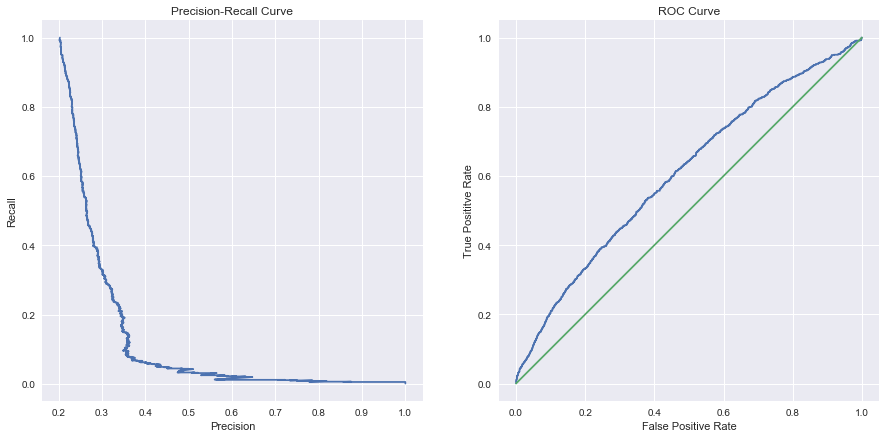

In [29]:
logr_model = LogisticRegression(penalty = 'l1')
std = StandardScaler()
#cv = KFold(n_splits = 4, shuffle = False)
cv = StratifiedKFold(n_splits = 4, shuffle = False)

for train_index, test_index in cv.split(X, y_series):    #loop over the folds
    X_train_lr, X_test_lr = X.iloc[train_index], X.iloc[test_index] #create training and test independent variable data without scaling
    std.fit(X_train) #apply fit only only training ddata
    X_tr_lr, X_te_lr = std.transform(X_train_lr), std.transform(X_test_lr)    #apply standard scaler and use to find best alpha
    y_train_lr, y_test_lr = y.iloc[train_index], y.iloc[test_index]

logr_model.fit(X_tr_lr, y_train_lr)
y_train_predict_vec = logr_model.predict(X_train)
    
y_prob_pred_mat = cross_val_predict(logr_model, X, y_series, cv=cv, method = 'predict_proba')
y_prob_pred_mat    
y_prob_pred_vec = y_prob_pred_mat[:,1]

fig, ax = plt.subplots(figsize = (15,7))

plt.subplot(1,2,1)
prec, recall, thresholds_pr = precision_recall_curve(y,y_prob_pred_vec)
plt.plot(prec[0:-1], recall[0:-1])

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')

plt.subplot(1,2,2)
fpr, tpr, thresholds_roc = roc_curve(y,y_prob_pred_vec)
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))
plt.ylabel('True Posititve Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')

In [ ]:
precision_recall_combo = []
for n in range(0, len(thresholds_pr)-1):
    combo = recall[n] + prec[n]
    precision_recall_combo.append(combo)

potential_threshold_index = np.argmax(precision_recall_combo)
print("potential thresholds are at indexes:", potential_threshold_index)
print("this is where recall is:", recall[potential_threshold_index], " and where precision is:", prec[potential_threshold_index])

In [ ]:
#CHOOSE PREC_THRESH MANUALLY!
prec_thresh = 0.2
tuple_thresh_index_prec_value = min(enumerate(prec), key=lambda x: abs(x[1]-prec_thresh))
print("What about using a threshold of index precision pair value:", tuple_thresh_index_prec_value)


In [ ]:
#WORK THROUGH POSSIBLE INDEX ADDITION AND SUBTRACTION TO FIND WHAT TO USE
possible_index = tuple_thresh_index_prec_value[0] 
print(possible_index)

thresholds_pr[possible_index], prec[possible_index], recall[possible_index], recall[possible_index] + prec[possible_index]

In [ ]:
thresh = thresholds_pr[possible_index]

hard_pred_vec = (y_prob_pred_vec > thresh).astype(int)

TP_over_TP_and_FP = precision_score(y, hard_pred_vec)
TP_over_TP_and_FN = recall_score(y, hard_pred_vec)
f1_val = f1_score(y, hard_pred_vec)
acc_val = accuracy_score(y, hard_pred_vec)
logloss_val = log_loss(y, y_prob_pred_vec)
rocauc_val = roc_auc_score(y, y_prob_pred_vec)
rocauc_val_train = roc_auc_score(y_train, y_train_predict_vec)

print("For our model type of:", logr_model)

print("\nPrecision Score is:", TP_over_TP_and_FP, "This is the proportion of True Positives out of (True Positives + False Positives)")
print("Recall Score is:", TP_over_TP_and_FN, "This is the proportion of True Positives out of (True Positives + False Negatives)")
print("f1 Score is:", f1_val)
print("Log Loss is:", logloss_val, "smaller is better")
print("ROC AUC Score is:", rocauc_val, "closest to 1 is best")
print("Training ROC AUC Score is:", rocauc_val_train)

TP_over_TP_and_FP_stupid = precision_score(y, stupid_pred_vec[0:len(y)])
TP_over_TP_and_FN_stupid = recall_score(y, stupid_pred_vec[0:len(y)])
f1_val_stupid = f1_score(y, stupid_pred_vec[0:len(y)])
acc_val_stupid = accuracy_score(y, stupid_pred_vec[0:len(y)])
logloss_val_stupid = log_loss(y, stupid_pred_proba_vec[0:len(y)])
rocauc_val_stupid = roc_auc_score(y, stupid_pred_proba_vec[0:len(y)])

print("\nStupid Precision Score is:", TP_over_TP_and_FP_stupid)
print("Stupid Recall Score is:", TP_over_TP_and_FN_stupid)
print("Stupid f1 Score is:", f1_val_stupid)
print("Stupid Log Loss is:", logloss_val_stupid)
print("Stupid ROC AUC Score is:", rocauc_val_stupid)

print("\nOur model has comparative scores to our stupid predictor of:")
print("Precision score is larger by:", TP_over_TP_and_FP - TP_over_TP_and_FP_stupid)
print("Recall score is larger by:", TP_over_TP_and_FN - TP_over_TP_and_FN_stupid)
print("f1 score is larger by:", f1_val - f1_val_stupid)
print("Log Loss score is smaller by :", -(logloss_val_stupid - logloss_val))
print("ROC AUC score is larger by:", rocauc_val - rocauc_val_stupid, '\n')

coeficients_list = list(zip(X.columns,logr_model.coef_[0]) )
coeficients_list.sort(key=lambda x: abs(x[1]), reverse = True)
for co in coeficients_list:
    print(co)

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 50, min_samples_leaf = 5)
rf_model.fit(X_train, y_train)
    
y_prob_pred_mat = cross_val_predict(rf_model, X, y_series, cv = cv, method = 'predict_proba')
y_prob_pred_mat    
y_prob_pred_vec = y_prob_pred_mat[:,1]

fig, ax = plt.subplots(figsize = (15,7))

plt.subplot(1,2,1)
prec, recall, thresholds_pr = precision_recall_curve(y,y_prob_pred_vec)
plt.plot(prec[0:-1], recall[0:-1])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')

plt.subplot(1,2,2)
fpr, tpr, thresholds_roc = roc_curve(y,y_prob_pred_vec)
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))
plt.ylabel('True Posititve Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')

In [ ]:
precision_recall_combo = []
for n in range(0, len(thresholds_pr)-1):
    combo = recall[n] + prec[n]
    precision_recall_combo.append(combo)

potential_threshold_index = np.argmax(precision_recall_combo)
print("potential thresholds are at indexes:", potential_threshold_index)
print("this is where recall is:", recall[potential_threshold_index], " and where precision is:", prec[potential_threshold_index])


In [ ]:
#DO THIS MANUALLY
prec_thresh = 0.3
tuple_thresh_index_prec_value = min(enumerate(prec), key=lambda x: abs(x[1]-prec_thresh))
print("What about using a threshold of index precision pair value:", tuple_thresh_index_prec_value)


In [ ]:
#WORK THROUGH POSSIBILITIES
possible_index = tuple_thresh_index_prec_value[0] 
print(possible_index)

thresholds_pr[possible_index], prec[possible_index], recall[possible_index], recall[possible_index] + prec[possible_index]

In [ ]:
thresh = thresholds_pr[possible_index]

hard_pred_vec = (y_prob_pred_vec > thresh).astype(int)

TP_over_TP_and_FP = precision_score(y, hard_pred_vec)
TP_over_TP_and_FN = recall_score(y, hard_pred_vec)
f1_val = f1_score(y, hard_pred_vec)
acc_val = accuracy_score(y, hard_pred_vec)
logloss_val = log_loss(y, y_prob_pred_vec)
rocauc_val = roc_auc_score(y, y_prob_pred_vec)

print("For our model type of:", rf_model)

print("\nPrecision Score is:", TP_over_TP_and_FP, "This is the proportion of True Positives out of (True Positives + False Positives)")
print("Recall Score is:", TP_over_TP_and_FN, "This is the proportion of True Positives out of (True Positives + False Negatives)")
print("f1 Score is:", f1_val)
print("Log Loss is:", logloss_val, "smaller is better")
print("ROC AUC Score is:", rocauc_val, "closest to 1 is best")

TP_over_TP_and_FP_stupid = precision_score(y_test, stupid_pred_vec[0:len(y_test)])
TP_over_TP_and_FN_stupid = recall_score(y_test, stupid_pred_vec[0:len(y_test)])
f1_val_stupid = f1_score(y_test, stupid_pred_vec[0:len(y_test)])
acc_val_stupid = accuracy_score(y_test, stupid_pred_vec[0:len(y_test)])
logloss_val_stupid = log_loss(y_test, stupid_pred_proba_vec[0:len(y_test)])
rocauc_val_stupid = roc_auc_score(y_test, stupid_pred_proba_vec[0:len(y_test)])

print("\nStupid Precision Score is:", TP_over_TP_and_FP_stupid)
print("Stupid Recall Score is:", TP_over_TP_and_FN_stupid)
print("Stupid f1 Score is:", f1_val_stupid)
print("Stupid Log Loss is:", logloss_val_stupid)
print("Stupid ROC AUC Score is:", rocauc_val_stupid)

print("\nOur model has comparative scores to our stupid predictor of:")
print("Precision score is larger by:", TP_over_TP_and_FP - TP_over_TP_and_FP_stupid)
print("Recall score is larger by:", TP_over_TP_and_FN - TP_over_TP_and_FN_stupid)
print("f1 score is larger by:", f1_val - f1_val_stupid)
print("Log Loss score is smaller by :", -(logloss_val_stupid - logloss_val))
print("ROC AUC score is larger by:", rocauc_val - rocauc_val_stupid, "\n")

feature_splits = (list(zip(X_test.columns, rf_model.feature_importances_)))
feature_splits.sort(key=lambda tup: abs(tup[1]), reverse = True)
for fe in feature_splits:
    print(fe)

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors = 40)
KNN_model.fit(X_train, y_train)
    
y_prob_pred_mat = cross_val_predict(KNN_model, X, y_series, cv = cv, method = 'predict_proba')
y_prob_pred_mat    
y_prob_pred_vec = y_prob_pred_mat[:,1]

fig, ax = plt.subplots(figsize = (15,7))

plt.subplot(1,2,1)
prec, recall, thresholds_pr = precision_recall_curve(y,y_prob_pred_vec)
plt.plot(prec[0:-1], recall[0:-1])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')

plt.subplot(1,2,2)
fpr, tpr, thresholds_roc = roc_curve(y,y_prob_pred_vec)
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))
plt.ylabel('True Posititve Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')

In [ ]:
precision_recall_combo = []
for n in range(0, len(thresholds_pr)-1):
    combo = recall[n] + prec[n]
    precision_recall_combo.append(combo)

potential_threshold_index = np.argmax(precision_recall_combo)
print("potential thresholds are at indexes:", potential_threshold_index)
print("this is where recall is:", recall[potential_threshold_index], " and where precision is:", prec[potential_threshold_index])


In [ ]:
#DO THIS MANUALLY
prec_thresh = 0.20
tuple_thresh_index_prec_value = min(enumerate(prec), key=lambda x: abs(x[1]-prec_thresh))
print("What about using a threshold of index precision pair value:", tuple_thresh_index_prec_value)


In [ ]:
#WORK THROUGH POSSIBILITIES
possible_index = tuple_thresh_index_prec_value[0] 
print(possible_index)

thresholds_pr[possible_index], prec[possible_index], recall[possible_index], recall[possible_index] + prec[possible_index]

In [27]:
thresh = thresholds_pr[possible_index]

hard_pred_vec = (y_prob_pred_vec > thresh).astype(int)

TP_over_TP_and_FP = precision_score(y, hard_pred_vec)
TP_over_TP_and_FN = recall_score(y, hard_pred_vec)
f1_val = f1_score(y, hard_pred_vec)
acc_val = accuracy_score(y, hard_pred_vec)
logloss_val = log_loss(y, y_prob_pred_vec)
rocauc_val = roc_auc_score(y, y_prob_pred_vec)

print("For our model type of:", KNN_model)

print("\nPrecision Score is:", TP_over_TP_and_FP, "This is the proportion of True Positives out of (True Positives + False Positives)")
print("Recall Score is:", TP_over_TP_and_FN, "This is the proportion of True Positives out of (True Positives + False Negatives)")
print("f1 Score is:", f1_val)
print("Log Loss is:", logloss_val, "smaller is better")
print("ROC AUC Score is:", rocauc_val, "closest to 1 is best")

TP_over_TP_and_FP_stupid = precision_score(y, stupid_pred_vec[0:len(y)])
TP_over_TP_and_FN_stupid = recall_score(y, stupid_pred_vec[0:len(y)])
f1_val_stupid = f1_score(y, stupid_pred_vec[0:len(y)])
acc_val_stupid = accuracy_score(y, stupid_pred_vec[0:len(y)])
logloss_val_stupid = log_loss(y, stupid_pred_proba_vec[0:len(y)])
rocauc_val_stupid = roc_auc_score(y, stupid_pred_proba_vec[0:len(y)])

print("\nStupid Precision Score is:", TP_over_TP_and_FP_stupid)
print("Stupid Recall Score is:", TP_over_TP_and_FN_stupid)
print("Stupid f1 Score is:", f1_val_stupid)
print("Stupid Log Loss is:", logloss_val_stupid)
print("Stupid ROC AUC Score is:", rocauc_val_stupid)

print("\nOur model has comparative scores to our stupid predictor of:")
print("Precision score is larger by:", TP_over_TP_and_FP - TP_over_TP_and_FP_stupid)
print("Recall score is larger by:", TP_over_TP_and_FN - TP_over_TP_and_FN_stupid)
print("f1 score is larger by:", f1_val - f1_val_stupid)
print("Log Loss score is smaller by :", -(logloss_val_stupid - logloss_val))
print("ROC AUC score is larger by:\n", rocauc_val - rocauc_val_stupid)


NameError: name 'thresholds_pr' is not defined

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
    
y_prob_pred_mat = cross_val_predict(NB_model, X, y_series, cv = cv, method = 'predict_proba')
y_prob_pred_mat    
y_prob_pred_vec = y_prob_pred_mat[:,1]

fig, ax = plt.subplots(figsize = (15,7))

plt.subplot(1,2,1)
prec, recall, thresholds_pr = precision_recall_curve(y,y_prob_pred_vec)
plt.plot(prec[0:-1], recall[0:-1])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')

plt.subplot(1,2,2)
fpr, tpr, thresholds_roc = roc_curve(y,y_prob_pred_vec)
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))
plt.ylabel('True Posititve Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')

In [ ]:
precision_recall_combo = []
for n in range(0, len(thresholds_pr)-1):
    combo = recall[n] + prec[n]
    precision_recall_combo.append(combo)

potential_threshold_index = np.argmax(precision_recall_combo)
print("potential thresholds are at indexes:", potential_threshold_index)
print("this is where recall is:", recall[potential_threshold_index], " and where precision is:", prec[potential_threshold_index])


In [ ]:
#DO THIS MANUALLY
prec_thresh = 0.20
tuple_thresh_index_prec_value = min(enumerate(prec), key=lambda x: abs(x[1]-prec_thresh))
print("What about using a threshold of index precision pair value:", tuple_thresh_index_prec_value)


In [ ]:
#WORK THROUGH POSSIBILITIES
possible_index = tuple_thresh_index_prec_value[0] 
print(possible_index)

thresholds_pr[possible_index], prec[possible_index], recall[possible_index], recall[possible_index] + prec[possible_index]

In [ ]:
thresh = thresholds_pr[possible_index]

hard_pred_vec = (y_prob_pred_vec > thresh).astype(int)

TP_over_TP_and_FP = precision_score(y, hard_pred_vec)
TP_over_TP_and_FN = recall_score(y, hard_pred_vec)
f1_val = f1_score(y, hard_pred_vec)
acc_val = accuracy_score(y, hard_pred_vec)
logloss_val = log_loss(y, y_prob_pred_vec)
rocauc_val = roc_auc_score(y, y_prob_pred_vec)

print("For our model type of:", NB_model)

print("\nPrecision Score is:", TP_over_TP_and_FP, "This is the proportion of True Positives out of (True Positives + False Positives)")
print("Recall Score is:", TP_over_TP_and_FN, "This is the proportion of True Positives out of (True Positives + False Negatives)")
print("f1 Score is:", f1_val)
print("Log Loss is:", logloss_val, "smaller is better")
print("ROC AUC Score is:", rocauc_val, "closest to 1 is best")

TP_over_TP_and_FP_stupid = precision_score(y, stupid_pred_vec[0:len(y)])
TP_over_TP_and_FN_stupid = recall_score(y, stupid_pred_vec[0:len(y)])
f1_val_stupid = f1_score(y, stupid_pred_vec[0:len(y)])
acc_val_stupid = accuracy_score(y, stupid_pred_vec[0:len(y)])
logloss_val_stupid = log_loss(y, stupid_pred_proba_vec[0:len(y)])
rocauc_val_stupid = roc_auc_score(y, stupid_pred_proba_vec[0:len(y)])

print("\nStupid Precision Score is:", TP_over_TP_and_FP_stupid)
print("Stupid Recall Score is:", TP_over_TP_and_FN_stupid)
print("Stupid f1 Score is:", f1_val_stupid)
print("Stupid Log Loss is:", logloss_val_stupid)
print("Stupid ROC AUC Score is:", rocauc_val_stupid)

print("\nOur model has comparative scores to our stupid predictor of:")
print("Precision score is larger by:", TP_over_TP_and_FP - TP_over_TP_and_FP_stupid)
print("Recall score is larger by:", TP_over_TP_and_FN - TP_over_TP_and_FN_stupid)
print("f1 score is larger by:", f1_val - f1_val_stupid)
print("Log Loss score is smaller by :", -(logloss_val_stupid - logloss_val))
print("ROC AUC score is larger by:\n", rocauc_val - rocauc_val_stupid)


In [115]:

Xrfcv = large_rf_test_df[final_useful_features]
yrfcv = large_rf_test_df[target_ind]


rf_model_rfs = RandomForestClassifier(n_estimators = 50, min_samples_leaf = 5)
cv = StratifiedKFold(n_splits = 4, shuffle = False)
feat_selector = RFECV(estimator=rf_model_rfs, step=1, cv=cv, scoring='roc_auc')
feat_selector = feat_selector.fit(Xrfcv, yrfcv)
print("RFECV thinks that there are only", np.sum(feat_selector.support_), "useful features out of,", len(feat_selector.support_))
print(feat_selector.support_ )
print(feat_selector.ranking_)
feature_choice_pairs = list(zip(feat_selector.support_, Xrfcv.columns))

feature_choice_pairs = list(zip(feat_selector.support_, Xrfcv.columns))

useful_features = [x[1] for x in feature_choice_pairs if x[0] == True]

print(useful_features)

/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFECV thinks that there are only 30 useful features out of, 30
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
['shrinking_next_yr', 'SP.POP.DPND.OL', 'dev_SP.POP.2024.FE.5Y', 'SP.POP.2024.FE.5Y', 'SP.POP.3034.FE.5Y', 'NY.GNS.ICTR.GN.ZS', 'time_del_MS.MIL.XPND.GD.ZS', 'SP.DYN.TFRT.IN', 'EN.ATM.CO2E.PC', 'SP.POP.5559.FE.5Y', 'NE.IMP.GNFS.ZS', 'NY.GDS.TOTL.ZS', 'TM.VAL.FUEL.ZS.UN', 'FS.AST.PRVT.GD.ZS', 'SE.PRM.ENRR', 'NV.SRV.TETC.ZS', 'dev_AG.PRD.FOOD.XD', 'IT.CEL.SETS.P2', 'SP.DYN.CDRT.IN', 'time_diff_SP.POP.DPND', 'NY.ADJ.DCO2.GN.ZS', 'NV.IND.TOTL.ZS', 'SP.DYN.LE00.MA.IN', 'SP.DYN.TO65.MA.ZS', 'FI.RES.TOTL.MO', 'time_del_AG.PRD.CROP.XD', 'NY.GDP.DEFL.KD.ZG', 'SP.DYN.LE00.FE.IN', 'SP.RUR.TOTL.ZS', 'NE.TRD.GNFS.ZS']


In [116]:
df_indicator_large.loc[df_indicator_large['indicator_code'].isin(useful_features)]

indicator_code                                     indicator_name  \
3       SP.RUR.TOTL.ZS           Rural population (% of total population)   
12      SP.DYN.CDRT.IN               Death rate, crude (per 1,000 people)   
13      SP.DYN.TFRT.IN           Fertility rate, total (births per woman)   
14   SP.DYN.LE00.MA.IN             Life expectancy at birth, male (years)   
15   SP.DYN.LE00.FE.IN           Life expectancy at birth, female (years)   
19   SP.DYN.TO65.MA.ZS             Survival to age 65, male (% of cohort)   
20   SP.POP.5559.FE.5Y  Population ages 55-59, female (% of female pop...   
51   SP.POP.2024.FE.5Y  Population ages 20-24, female (% of female pop...   
55   SP.POP.3034.FE.5Y  Population ages 30-34, female (% of female pop...   
59      SP.POP.DPND.OL  Age dependency ratio, old (% of working-age po...   
80      EN.ATM.CO2E.PC             CO2 emissions (metric tons per capita)   
101     IT.CEL.SETS.P2     Mobile cellular subscriptions (per 100 people)   
105  NY.GDP.DEFL.KD.ZG                 Inflation, GDP deflator (annual %)   
121     NE.TRD.GNFS.ZS                                   Trade (% of GDP)   
122     NE.IMP.GNFS.ZS           Imports of goods and services (% of GDP)   
147  FS.AST.PRVT.GD.ZS       Domestic credit to private sector (% of GDP)   
164     NY.GDS.TOTL.ZS                  Gross domestic savings (% of GDP)   
175  NY.ADJ.DCO2.GN.ZS  Adjusted savings: carbon dioxide damage (% of ...   
191        SE.PRM.ENRR               School enrollment, primary (% gross)   
235  TM.VAL.FUEL.ZS.UN            Fuel imports (% of merchandise imports)   
239     NV.SRV.TETC.ZS             Services, etc., value added (% of GDP)   
240     NV.IND.TOTL.ZS                   Industry, value added (% of GDP)   
347     FI.RES.TOTL.MO                Total reserves in months of imports   
402  NY.GNS.ICTR.GN.ZS                           Gross savings (% of GNI)   

         0  
3    14552  
12   13696  
13   13523  
14   13498  
15   13498  
19   13440  
20   13376  
51   13376  
55   13376  
59   13373  
80   11907  
101  10863  
105  10808  
121  10432  
122  10432  
147   9999  
164   9608  
175   9367  
191   8975  
235   8187  
239   8169  
240   8154  
347   7341  
402   6866

In [241]:
df_indicator_large.loc[df_indicator_large['indicator_code'].isin(final_useful_features)]

indicator_code                                     indicator_name  \
3       SP.RUR.TOTL.ZS           Rural population (% of total population)   
12      SP.DYN.CDRT.IN               Death rate, crude (per 1,000 people)   
13      SP.DYN.TFRT.IN           Fertility rate, total (births per woman)   
14   SP.DYN.LE00.MA.IN             Life expectancy at birth, male (years)   
15   SP.DYN.LE00.FE.IN           Life expectancy at birth, female (years)   
19   SP.DYN.TO65.MA.ZS             Survival to age 65, male (% of cohort)   
20   SP.POP.5559.FE.5Y  Population ages 55-59, female (% of female pop...   
51   SP.POP.2024.FE.5Y  Population ages 20-24, female (% of female pop...   
55   SP.POP.3034.FE.5Y  Population ages 30-34, female (% of female pop...   
59      SP.POP.DPND.OL  Age dependency ratio, old (% of working-age po...   
80      EN.ATM.CO2E.PC             CO2 emissions (metric tons per capita)   
81      SP.DYN.IMRT.IN     Mortality rate, infant (per 1,000 live births)   
82         SH.DYN.MORT    Mortality rate, under-5 (per 1,000 live births)   
101     IT.CEL.SETS.P2     Mobile cellular subscriptions (per 100 people)   
105  NY.GDP.DEFL.KD.ZG                 Inflation, GDP deflator (annual %)   
121     NE.TRD.GNFS.ZS                                   Trade (% of GDP)   
122     NE.IMP.GNFS.ZS           Imports of goods and services (% of GDP)   
142  NY.GDP.FRST.RT.ZS                            Forest rents (% of GDP)   
147  FS.AST.PRVT.GD.ZS       Domestic credit to private sector (% of GDP)   
164     NY.GDS.TOTL.ZS                  Gross domestic savings (% of GDP)   
175  NY.ADJ.DCO2.GN.ZS  Adjusted savings: carbon dioxide damage (% of ...   
191        SE.PRM.ENRR               School enrollment, primary (% gross)   
235  TM.VAL.FUEL.ZS.UN            Fuel imports (% of merchandise imports)   
239     NV.SRV.TETC.ZS             Services, etc., value added (% of GDP)   
240     NV.IND.TOTL.ZS                   Industry, value added (% of GDP)   
347     FI.RES.TOTL.MO                Total reserves in months of imports   
402  NY.GNS.ICTR.GN.ZS                           Gross savings (% of GNI)   

         0  
3    14552  
12   13696  
13   13523  
14   13498  
15   13498  
19   13440  
20   13376  
51   13376  
55   13376  
59   13373  
80   11907  
81   11883  
82   11882  
101  10863  
105  10808  
121  10432  
122  10432  
142  10030  
147   9999  
164   9608  
175   9367  
191   8975  
235   8187  
239   8169  
240   8154  
347   7341  
402   6866